<h3 align="center">DS-301 HW2</h3> 
<h3 align="center">Grace Yang</h3> 
<h3 align="center">gy654, N10610063</h3> 

## Problem 1 - Perceptron 15 points

Consider a 2-dimensional data set in which all points with $x_1 > x_2$ belong to the positive class, and all points with $x_1 ≤ x_2$ belong to the negative class. Therefore, the true separator of the two classes is linear hyperplane (line) defined by $x_1 − x_2 = 0.$ Now create a training data set with 10 points randomly generated inside the unit square in the positive quadrant. Label each point depending on whether or not the first coordinate $x_1$ is
greater than its second coordinate $x_2$. Now consider the following loss function for training pair $(\bar{X}, y)$ and weight vector $\bar{W}$ :
$$L = max\{0, a-y(\bar{W} \cdot \bar{X})\}$$
where the test instances are predicted as $\hat{y} = \{\bar{W} \cdot \bar{X}\}.$ For this problem, $\bar{W} = [w_1, w_2], \bar{X} = [X_1, X_2]$ and $\hat{y} = (w_1x_1 + w_2x_2)$. A value of a = 0 corresponds to the perceptron criterion and a value of a = 1 corresponds to hinge-loss.

1. You need to implement the perceptron algorithm without regularization, train it on the 10 points above, and test its accuracy on 5000 randomly generated points inside the unit square. Generate the test points using the same procedure as the training points. You need to have your own implementation of the perceptron algorithm, using the perceptron criterion loss function. (6)

In [4]:
import numpy as np
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def generate_train_and_test(train_size, test_size):
  rng = np.random.RandomState()
  train_data = rng.uniform(0, 1, size = (train_size, 3))
  test_data = rng.uniform(0, 1, size = (test_size, 3))
  for i in range(len(train_data)):
    train_data[i][2]=1 if train_data[i][0]> train_data[i][1] else -1
  for i in range(len(test_data)):
    test_data[i][2]=1 if test_data[i][0]> test_data[i][1] else -1
    
  train_X = train_data[:, :2] # 10*2
  train_y = train_data[:, 2]  # 10*1

  test_X = test_data[:, :2] # 5000*2
  test_y = test_data[:, 2] # 5000*1
  return train_X, train_y, test_X, test_y


In [ ]:
class Perceptron:
  
  #constructor
  def __init__ (self, a):
    self.w = np.array(np.random.rand(1,2))
    self.a = a
    
  #model  
  def model(self, x):
    return np.dot(self.w, x) 
  
  #predictor to predict on the data based on w
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def loss(self, x, y):
    temp = self.a - y *  self.model(x)
    l = max(0, temp)
    return l
    
  def fit(self, X, Y, epochs = 10, lr = 0.5):
    self.w = np.ones(X.shape[1])
    accuracy = {}
    max_accuracy = 0
    wt_matrix = []
    #for all epochs
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        # print(f'what is y and yhat:{y},{y_pred}')
        # there is loss (update weight) only when when y=1 and wx<0
        sample_loss = self.loss(x, y)
        #print(sample_loss)
        if sample_loss >0:
          self.w = self.w + lr * x * y
          
      wt_matrix.append(self.w)  
      binary_predict = np.array([-1 if i<0 else 1 for i in self.predict(X)])
      accuracy[i] = accuracy_score(binary_predict, Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w

    self.w = chkptw
    
    #return the weight matrix, that contains weights over all epochs
    return np.array(wt_matrix)

In [ ]:
train_X, train_y, test_X, test_y = generate_train_and_test(10, 5000)

perceptron = Perceptron(0)
wt_matrix = perceptron.fit(train_X, train_y, epochs=3)
Y_pred_test = perceptron.predict(test_X)
Y_pred_test_binary = [-1 if i<0 else 1 for i in Y_pred_test]
print(f'Accuracy of perceptron using the perceptron criterion loss function: {accuracy_score(Y_pred_test_binary, test_y)}')

Accuracy of perceptron using the perceptron criterion loss function: 0.7444


2. Change the loss function from perceptron criterion to hinge-loss in your inplementation for training, and repeat the accuracy computation on the samoe test points above. Regularization is not used.

In [ ]:
train_X, train_y, test_X, test_y = generate_train_and_test(10, 5000)
perceptron_hinge = Perceptron(1)
wt_matrix_hinge = perceptron_hinge.fit(train_X, train_y, epochs=3)
Y_pred_test_hinge = perceptron_hinge.predict(test_X)
Y_pred_test_binary_hinge = [-1 if i<0 else 1 for i in Y_pred_test_hinge]
print(f'Accuracy of perceptron using the hinge loss function: {accuracy_score(Y_pred_test_binary_hinge, test_y)}')

Accuracy of perceptron using the hinge loss function: 0.8854


3. In which case do you obtain better test accuracy and why?

The perceptron model with hinge loss function obtains better test accuracy, since compared to the model under perceptron criterion(a=0) , the model under hinge loss has a larger interval for updating weights. It stops updatung weights only when the prediction score has some distance from the decsion boundary. It updates the weights even if the model correcly classifies a sample but with a lower confidence score, encouraging the model to learn the pattern from the training data. 

4. In which case do you think that the classification of the same 5000 test instances will not change significantly by using a different set of 10 trining points?

In [ ]:
def generate_trainings(num_per_train):
  rng = np.random.RandomState()
  train_data = rng.uniform(0, 1, size = (num_per_train, 3))
  for i in range(len(train_data)):
    train_data[i][2]=1 if train_data[i][0]> train_data[i][1] else -1 
    train_X = train_data[:, :2] # 10*2
    train_y = train_data[:, 2]  # 10*1
  return train_X, train_y


def see_test_accuracy_variance(a):
  accuracy_l = []

  for i in range(5):
    train_X, train_y = generate_trainings(10)
    perceptron = Perceptron(a)
    wt_matrix = perceptron.fit(train_X, train_y, epochs=5)
    Y_pred_test = perceptron.predict(test_X)
    Y_pred_test_binary = [-1 if i<0 else 1 for i in Y_pred_test]
    accuracy = accuracy_score(Y_pred_test_binary, test_y)
    accuracy_l.append(accuracy)
  return accuracy_l

  
accuracy_l_0 = see_test_accuracy_variance(0)
accuracy_l_1 = see_test_accuracy_variance(1)

print(f'under perceptron criterion: accuracy on the same test set wth 5 different train sets:{accuracy_l_0}')
print(f'under hinge loss: accuracy on the same test set wth 5 different train sets:{accuracy_l_1}')

under perceptron criterion: accuracy on the same test set wth 5 different train sets:[0.938, 0.9346, 0.9342, 0.7798, 0.9912]
under hinge loss: accuracy on the same test set wth 5 different train sets:[0.8182, 0.5036, 0.683, 0.9556, 0.8082]


Under the perceptron criterion(a=0), the classification of the same 5000 test instances will not change significantly by using a different set of 10 trining points, since there is a lower probability of weight update compared to the model under hinge loss. As a consequence, the perceptron model is less sensitive to the variance of the training data and will have ralative stable performance on the same test set. 

## Problem 2 - Precision, Recall, ROC 15 points
This question is based on a paper from ICML 2006 (reference below) that talks about the relationship between ROC and Precision-Recall (PR) curves and shows a one-to-one correspondence between them. You need to
read the paper to answer the following questions.
1. Does true negative matter for both ROC and PR curve ? Argue why each point on ROC curve corresponds to a unique point on PR curve ? (5)

True negative matter for ROC but not for PR curve since in ROC, $FPR = \frac{FP}{FP + TN}$, but TN is not involved in precision or recall calculation. 
A point in ROC space defines a unique confusion matrix when the dataset is fixed. With a fixed number of positive and negative examples, given the other three entries in a matrix, TN is uniquely determined. If Recall = 0, we are unable to recover FP, and thus cannot find a unique confusion matrix. Consequently, we have a one-to-one mapping between confusion matrices and points in PR space. This implies that we also have a one-to-one mapping between points (each defined by a confusion matrix) in ROC space and PR space; hence, we can translate a curve in ROC space to PR space and vice-versa.

2. Select one OpenML dataset with 2 output classes. Use two binary classifiers (Adaboost and Logistic regression) and create ROC and PR curves for each of them. You will have two figures: one containing two ROC and other containing two PR curves. Show the point where an all positive classifier lies in the ROC and PR curves. An all positive classifier classifies all the samples as positive. (10)
Reference paper:
• Jesse Davis, Mark Goadrich, The Relationship Between Precision-Recall and ROC Curves, ICML 2006.

In [1]:
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, plot_roc_curve, plot_precision_recall_curve
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
data_path = '/content/drive/MyDrive/ds301HW/compas.arff'
dataset, meta = arff.loadarff(data_path)
compas = pd.DataFrame(dataset)
compas = compas.astype(int)
y = pd.Series(compas['two_year_recid'])
X = compas.drop(['two_year_recid'], axis = 1)
StandardScaler().fit(X).transform(X)
train_X, test_X, train_y,test_y = train_test_split(X, y, test_size=0.2, random_state=42)

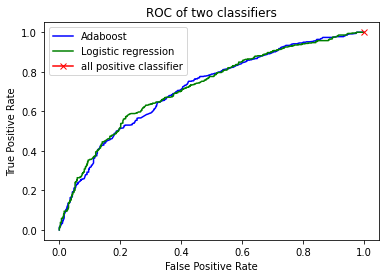

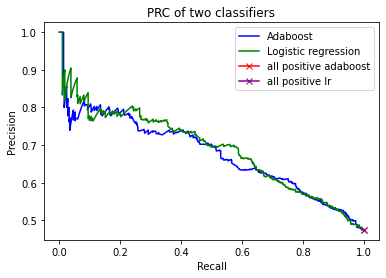

In [5]:
adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=0).fit(train_X, train_y)
y_test_prob_ada = adaboost_clf.predict_proba(test_X)[:, 1]

lr_clf = LogisticRegression(random_state=0).fit(train_X, train_y)
y_test_prob_lr = lr_clf.predict_proba(test_X)[:, 1]

ada_fpr, ada_tpr, ada_thresholds = sklearn.metrics.roc_curve(test_y, y_test_prob_ada)
lr_fpr, lr_tpr, lr_thresholds = sklearn.metrics.roc_curve(test_y, y_test_prob_lr)

precision_ada, recall_ada, thresholds_ada = sklearn.metrics.precision_recall_curve(test_y, y_test_prob_ada)
precision_lr, recall_lr, thresholds_lr = sklearn.metrics.precision_recall_curve(test_y, y_test_prob_lr)

plt.plot(ada_fpr, ada_tpr, label='Adaboost', color = 'blue')
plt.plot(lr_fpr, lr_tpr, label='Logistic regression', color = 'green')
plt.plot(1,1, "-x", label = 'all positive classifier',color = "red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title('ROC of two classifiers')
plt.show()


plt.plot( recall_ada, precision_ada, label='Adaboost', color = 'blue')
plt.plot( recall_lr, precision_lr, label='Logistic regression', color = 'green')
plt.plot(1, precision_ada[0], "-x", label = 'all positive adaboost',color = "red")
plt.plot(1, precision_lr[0], "-x", label = 'all positive lr',color = "purple")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title('PRC of two classifiers')
plt.show()

## Problem 3 - Linear Separability 10 points
Consider a dataset with two features $x_1$ and $x_2$ in which the points (−1, −1),(1, 1),(−3, −3),(4, 4) belong to one class and (−1, 1),(1, −1),(−5, 2),(4, −8) belong to the other.
1. Is this dataset linearly separable ? Can a linear classifier be trained using features x1 and x2 to classify
this data set ? You can plot the dataset points and argue. (2)


We cannot train a linear classifier that uses feature $x_1$ and $x_2$ to classify this dataset. All four points in class one lie on a line. We cannot plot two convexhulls for both classes that do not intersect with each other. Therefore, the dataset is not linearly separable. 

Text(0.5, 1.0, 'two clusters')

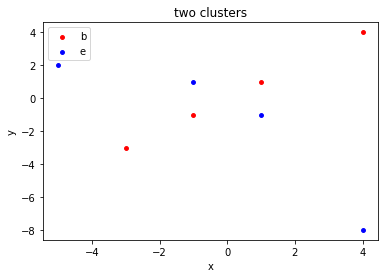

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


cluster_a = np.array([[-1, -1], [1, 1], [-3, -3], [4, 4]])
cluster_b = np.array([[-1, 1], [1, -1], [-5, 2], [4, -8]])
colors = ['red', 'blue']

plt.scatter(cluster_a[:,0], cluster_a[:,1], color = colors[0], s=15, label="Cluster1")
plt.scatter(cluster_b[:,0], cluster_b[:,1], color = colors[1], s=15, label="Cluster2")
plt.legend('best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('two clusters')


2. Can you define a new 1-dimensional representation z in terms of x1 and x2 such that the dataset is linearly separable in terms of 1-dimensional representation corresponding to z ? (4)

3. What does the separating hyperplane looks like ? (2)


We can define a 1-d representation $z = x_1 \cdot x_2$ such that the dataset is linearly separable by $x=0$ in terms of 1d representation corresponding to $z$.

$x=0$ is the separating hyperplane.

Text(0.5, 1.0, 'linearly separable with 1d representation z=$x_1*x_2$')

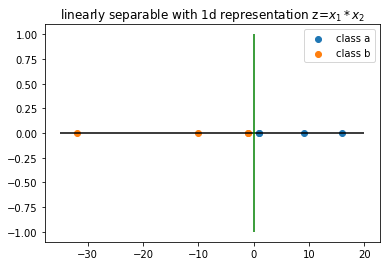

In [ ]:

z_a = np.array([i[0]*i[1] for i in cluster_a])
z_b = np.array([i[0]*i[1] for i in cluster_b])
y = np.zeros_like(z_a)

plt.hlines(0, -35, 20)
plt.scatter(z_a,y, label = 'class a')
plt.scatter(z_b,y, label = 'class b' )
plt.vlines(0, -1, 1, color = 'green')
plt.legend()
plt.title('linearly separable with 1d representation z=$x_1*x_2$')

4. Explain the importance of nonlinear transformations in classification problems. (2)

In cases where classes of points cannot be separated by any linear classifer, non-linear transformations enable us to maps our raw input features into a space where data are linearly separable by a linear classifier. 

## Problem 4 - Softmax Activation Function 10 points
Consider the softmax activation function in the output layer, in which real-valued outputs $v_1, . . . , v_k$ are converted into probabilities as follows:
$$o_i = \frac{exp(v_i)}{\sum_{j=1}^{k} exp(v_j)} \forall i \in \{1, ..., k\}$$
1. Show that the value of $\frac{\partial o_i}{\partial v_j}$ ia $o_i(1-o_i)$ when $i=j$ and $-o_io_j$ when $i \neq j$

- when $i = j$, 

$$o_i = e^{v_i}(\sum_{j=1}^{k} e^{v_j})^{-1}$$
$$\frac{\partial o_i}{\partial v_j}= \frac{\partial e^{v_i}}{\partial v_j} \cdot (\sum_{j=1}^{k} e^{v_j})^{-1} + e^{v_i} \cdot (-1) (\sum_{j=1}^{k} e^{v_j})^{-2} \cdot e^{v_j} = e^{v_j} \cdot (\sum_{j=1}^{k} e^{v_j})^{-1} - (e^{v_j})^2 \cdot (\sum_{j=1}^{k} e^{v_j})^{-2} = o_i - o_i^2 = o_i(1-o_i)$$

- when $i \neq j$
$$\frac{\partial o_i}{\partial v_j}= \frac{\partial e^{v_i}}{\partial v_j} \cdot (\sum_{j=1}^{k} e^{v_j})^{-1} + e^{v_i} \cdot (-1) (\sum_{j=1}^{k} e^{v_j})^{-2} \cdot e^{v_j} = -e^{v_i} e^{v_j} \cdot (\sum_{j=1}^{k} e^{v_j})^{-2} = -e^{v_i} \cdot (\sum_{j=1}^{k} e^{v_j})^{-1} \cdot -e^{v_j} \cdot (\sum_{j=1}^{k} e^{v_j})^{-1} = -o_io_j$$


2. Assume that we are using cross-entropy loss $L = -\sum_{i=1}^{k}y_ilog(o_i)$, where $y_i \in \{0,1\}$ is the one-hot encoded class label over different values of $i \in \{1, ...k\}.$ Use the result in part 1 to show the correctness of the following equation:
$$\frac{\partial L}{\partial v_i} = o_i - y_i$$

$$\frac{\partial L}{\partial v_i} = -\sum_{i=1}^{k}y_i \frac{\partial log(o_i)}{\partial o_i} \cdot \frac{\partial o_i}{\partial v_i} = -\sum_{i \neq j}[\frac{y_i}{o_i} \times (-o_io_j)] + \frac{y_i}{o_i} \times o_i(1-o_i ) = (-\sum_{i \neq j} -y_io_i) + y_i(1-o_i) = o_i(\sum_{i \neq j}y_i) - y_i(1-o_i)= o_i(1-y_i)-y_i(1-o_i) = o_i-y_i$$

## Problem 5 - Weight Initialization, Dead Neurons, Leaky ReLU 25 points
Read the two blogs, one by Andre Pernunicic and other by Daniel Godoy on weight initialization. You will reuse the code at github repo linked in the blog for explaining vanishing and exploding gradients. You can use the same 5 layer neural network model as in the repo and the same dataset.
1. Explain vanishing gradients phenomenon using standard normalization with different values of standard deviation as given in the reference. Train the model with tanh and sigmoid activation functions. Next,show how Xavier (aka Glorot normal) init ialization of weights helps in dealing with this problem. You should plot the gradients at each of the 5 layers for all 4 experiments to answer this question. (10)



11501568/11490434 [==============================] - 0s 0us/step
tanh activation and random normal initialization


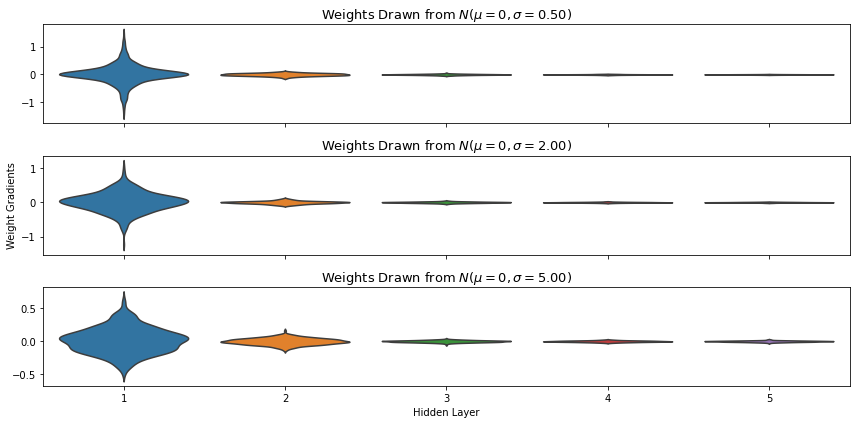

sigmoid activation and random normal initialization


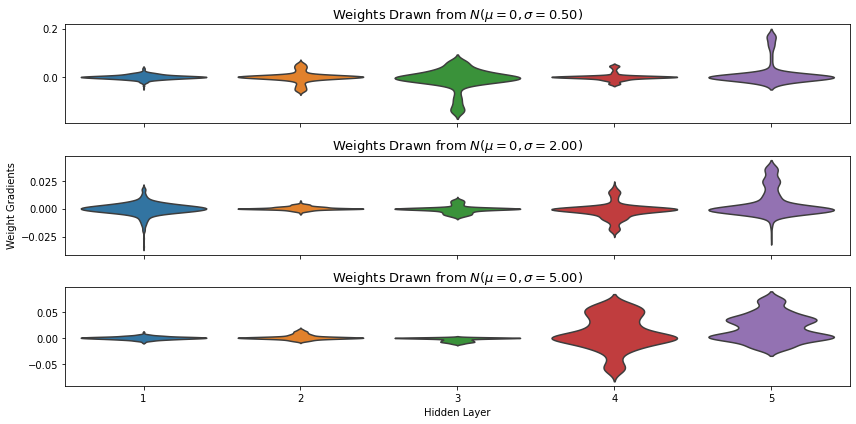

tanh activation and GlorotNormal initialization


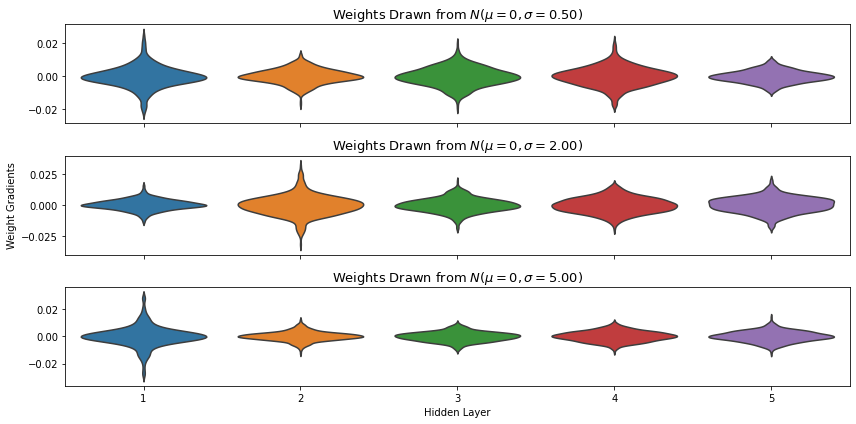

sigmoid activation and GlorotNormal initialization


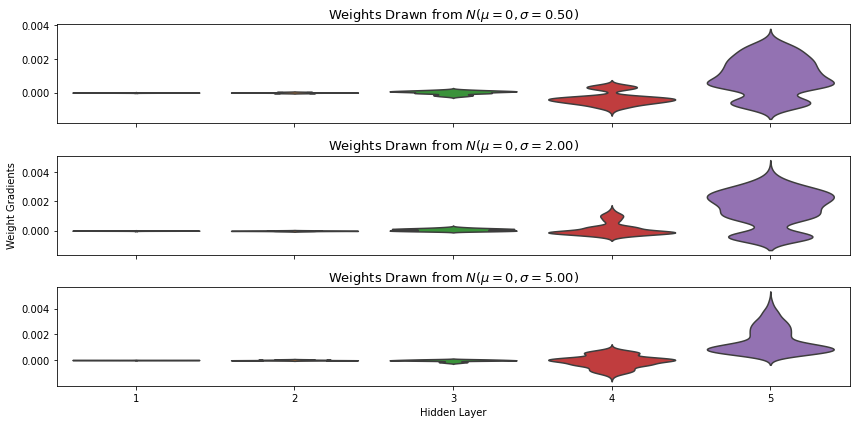

<Figure size 432x288 with 0 Axes>

In [ ]:
%run './drive/MyDrive/ds301HW/plot-activation-layers.py'

vanishing gradients phenomenon: I used normal distribution initiation with different values of standard deviation (0.5, 2, 5) and 0 mean. Observe that under tanh activation, the magnitude of gradients gets smaller as the neuronetwork gets deeper in layer, suggesting that weights in those layers will not update much as the training goes on and eventually stop learning. 


I train the model with sigmoid activation functions. With normal initialization of weights, sigmoid activation helps deal with the gradient vanishing problem. Then I tried the Xavier (aka Glorot normal) initialization of weights. Xavier helps in dealing with solving the gradient vanishing problem as we observe that if using sigmoid activation, the magitude of gradients become similar across layers and gradients do not vanish as the previous case. However, if we use Glorot initialization with tanh activation, we may have gradient explosion problem. 

2. The dying ReLU is a kind of vanishing gradient, which refers to a problem when ReLU neurons become inactive and only output 0 for any input. In the worst case of dying ReLU, ReLU neurons at a certain layer are all dead, i.e., the entire network dies and is referred as the dying ReLU neural networks in Lu et al (reference below). A dying ReLU neural network collapses to a constant function. Show this phenomenon using any one of the three 1-dimensional functions in page 13 of Lu et al. Use a ReLU network with 10 hidden layers, each of width 2 (hidden units per layer). Use minibatch of 64 and draw training data uniformly from $[-\sqrt{7}, \sqrt{7}]$. Perform 1000 independent training simulations each with 3,000 training points. Out of these 1000 simulations, what fraction resulted in neural network collapse.
Is your answer close to over 90% as was reported in Lu et al.? (10)

In [ ]:
from collections import Counter
from tensorflow import keras
from tqdm import tqdm
import numpy as np
from keras import initializers

In [ ]:
seed = 10
n_train = 3000
n_test = 500
n_hidden_layers = 10
num_simulations = 1000
func = lambda x: abs(x)

test_X = np.random.uniform(-np.sqrt(7),np.sqrt(7),n_test)
test_y = func(test_X)

def network_collapse(activation,num_simulations):
  constant_f = 0
  for i in tqdm(range(num_simulations)):
    train_X = np.random.uniform(-np.sqrt(7),np.sqrt(7),n_train)
    train_y = func(train_X)
    initializer = initializers.HeNormal(seed=None)
    model = keras.Sequential()
    model.add(keras.layers.Dense(units = 1, activation = activation, input_shape=(1,)))
    for _ in range(n_hidden_layers):
      model.add(keras.layers.Dense(units = 2, activation = activation))
    model.add(keras.layers.Dense(units = 1, activation = activation))
    model.compile(loss='mse', optimizer="adam")
    model.fit(train_X, train_y, epochs=1, batch_size=64)
    y_predicted = model.predict(test_X)

    # print(y_predicted)
    if Counter(np.squeeze(y_predicted, axis = 1))[0] == n_test:
      constant_f +=1
    constant_ratio = constant_f/num_simulations
  print(f'\nOut of the 1000 simulations, {constant_ratio} resulted in neuronetwork collapse.')
  return constant_ratio

activation = 'relu'
network_collapse(activation, num_simulations)


  0%|          | 0/1000 [00:00<?, ?it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3132


  0%|          | 1/1000 [00:00<13:31,  1.23it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3422


  0%|          | 2/1000 [00:01<13:04,  1.27it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3275


  0%|          | 3/1000 [00:02<13:35,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2902


  0%|          | 4/1000 [00:03<15:58,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3064


  0%|          | 5/1000 [00:04<15:10,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3579


  1%|          | 6/1000 [00:05<14:59,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3069


  1%|          | 7/1000 [00:06<14:23,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3515


  1%|          | 8/1000 [00:06<13:54,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3261


  1%|          | 9/1000 [00:07<13:30,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3282


  1%|          | 10/1000 [00:08<13:18,  1.24it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2989


  1%|          | 11/1000 [00:09<13:45,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3816


  1%|          | 12/1000 [00:10<13:25,  1.23it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3301


  1%|▏         | 13/1000 [00:10<13:38,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3367


  1%|▏         | 14/1000 [00:11<13:21,  1.23it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3417


  2%|▏         | 15/1000 [00:13<15:26,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3738


  2%|▏         | 16/1000 [00:13<14:37,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3403


  2%|▏         | 17/1000 [00:14<13:58,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3391


  2%|▏         | 18/1000 [00:15<13:40,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2894


  2%|▏         | 19/1000 [00:16<13:33,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3872


  2%|▏         | 20/1000 [00:17<13:46,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3545


  2%|▏         | 21/1000 [00:17<13:47,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3695


  2%|▏         | 22/1000 [00:18<13:25,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3461


  2%|▏         | 23/1000 [00:19<13:13,  1.23it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2835


  2%|▏         | 24/1000 [00:20<13:02,  1.25it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3544


  2%|▎         | 25/1000 [00:20<12:53,  1.26it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3018


  3%|▎         | 26/1000 [00:22<15:11,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3515


  3%|▎         | 27/1000 [00:23<14:29,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3692


  3%|▎         | 28/1000 [00:23<14:21,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3864


  3%|▎         | 29/1000 [00:24<13:54,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3437


  3%|▎         | 30/1000 [00:25<13:35,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3306


  3%|▎         | 31/1000 [00:26<13:20,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3299


  3%|▎         | 32/1000 [00:27<13:13,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3578


  3%|▎         | 33/1000 [00:27<13:25,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3665


  3%|▎         | 34/1000 [00:28<13:29,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3917


  4%|▎         | 35/1000 [00:29<13:08,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3872


  4%|▎         | 36/1000 [00:30<15:29,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3510


  4%|▎         | 37/1000 [00:31<14:38,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3203


  4%|▍         | 38/1000 [00:32<14:05,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3533


  4%|▍         | 39/1000 [00:33<13:42,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3694


  4%|▍         | 40/1000 [00:34<13:28,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3610


  4%|▍         | 41/1000 [00:34<13:11,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3483


  4%|▍         | 42/1000 [00:35<13:03,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3793


  4%|▍         | 43/1000 [00:36<13:01,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3890


  4%|▍         | 44/1000 [00:37<13:15,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3578


  4%|▍         | 45/1000 [00:38<12:59,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2663


  5%|▍         | 46/1000 [00:38<12:48,  1.24it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3327


  5%|▍         | 47/1000 [00:40<15:04,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3345


  5%|▍         | 48/1000 [00:41<14:42,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3771


  5%|▍         | 49/1000 [00:41<14:08,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3055


  5%|▌         | 50/1000 [00:42<13:37,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3666


  5%|▌         | 51/1000 [00:43<13:20,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2574


  5%|▌         | 52/1000 [00:44<13:28,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3172


  5%|▌         | 53/1000 [00:45<13:09,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3185


  5%|▌         | 54/1000 [00:45<12:53,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3611


  6%|▌         | 55/1000 [00:46<13:06,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3024


  6%|▌         | 56/1000 [00:47<13:14,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3219


  6%|▌         | 57/1000 [00:48<15:16,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3303


  6%|▌         | 58/1000 [00:49<14:29,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2568


  6%|▌         | 59/1000 [00:50<13:49,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.8565


  6%|▌         | 60/1000 [00:51<13:34,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3385


  6%|▌         | 61/1000 [00:52<13:41,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3132


  6%|▌         | 62/1000 [00:53<13:46,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3190


  6%|▋         | 63/1000 [00:53<13:31,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3028


  6%|▋         | 64/1000 [00:54<13:28,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3495


  6%|▋         | 65/1000 [00:55<13:00,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3564


  7%|▋         | 66/1000 [00:56<12:46,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3511


  7%|▋         | 67/1000 [00:57<13:02,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.8329


  7%|▋         | 68/1000 [00:58<15:24,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3012


  7%|▋         | 69/1000 [00:59<14:56,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3709


  7%|▋         | 70/1000 [01:00<14:39,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2955


  7%|▋         | 71/1000 [01:01<14:27,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3837


  7%|▋         | 72/1000 [01:02<13:46,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3921


  7%|▋         | 73/1000 [01:02<13:21,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2470


  7%|▋         | 74/1000 [01:03<12:59,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2797


  8%|▊         | 75/1000 [01:04<12:48,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3509


  8%|▊         | 76/1000 [01:05<12:38,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3481


  8%|▊         | 77/1000 [01:06<12:34,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3425


  8%|▊         | 78/1000 [01:06<12:46,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3594


  8%|▊         | 79/1000 [01:08<15:17,  1.00it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3071


  8%|▊         | 80/1000 [01:09<14:44,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3329


  8%|▊         | 81/1000 [01:10<13:56,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2901


  8%|▊         | 82/1000 [01:10<13:43,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3576


  8%|▊         | 83/1000 [01:11<13:15,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3469


  8%|▊         | 84/1000 [01:12<12:58,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2826


  8%|▊         | 85/1000 [01:13<12:46,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3778


  9%|▊         | 86/1000 [01:14<12:28,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3218


  9%|▊         | 87/1000 [01:14<12:14,  1.24it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3798


  9%|▉         | 88/1000 [01:15<12:04,  1.26it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3850


  9%|▉         | 89/1000 [01:17<14:38,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2922


  9%|▉         | 90/1000 [01:17<13:51,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2884


  9%|▉         | 91/1000 [01:18<13:14,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3614


  9%|▉         | 92/1000 [01:19<12:51,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4021


  9%|▉         | 93/1000 [01:20<12:58,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3659


  9%|▉         | 94/1000 [01:21<12:38,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3347


 10%|▉         | 95/1000 [01:21<12:19,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3374


 10%|▉         | 96/1000 [01:22<12:08,  1.24it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3037


 10%|▉         | 97/1000 [01:23<12:05,  1.24it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3388


 10%|▉         | 98/1000 [01:24<12:25,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3556


 10%|▉         | 99/1000 [01:25<12:08,  1.24it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3517


 10%|█         | 100/1000 [01:26<14:35,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3672


 10%|█         | 101/1000 [01:27<14:10,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3462


 10%|█         | 102/1000 [01:28<13:51,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3940


 10%|█         | 103/1000 [01:28<13:10,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3605


 10%|█         | 104/1000 [01:29<13:08,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3091


 10%|█         | 105/1000 [01:30<12:43,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3617


 11%|█         | 106/1000 [01:31<12:28,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3530


 11%|█         | 107/1000 [01:32<12:18,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4147


 11%|█         | 108/1000 [01:33<12:28,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3778


 11%|█         | 109/1000 [01:33<12:14,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3089


 11%|█         | 110/1000 [01:34<12:24,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3634


 11%|█         | 111/1000 [01:36<14:35,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3812


 11%|█         | 112/1000 [01:36<14:08,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3327


 11%|█▏        | 113/1000 [01:37<13:31,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3838


 11%|█▏        | 114/1000 [01:38<12:57,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3138


 12%|█▏        | 115/1000 [01:39<12:27,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3300


 12%|█▏        | 116/1000 [01:40<12:28,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3751


 12%|█▏        | 117/1000 [01:40<12:18,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2769


 12%|█▏        | 118/1000 [01:41<12:23,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2788


 12%|█▏        | 119/1000 [01:42<12:02,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3417


 12%|█▏        | 120/1000 [01:43<11:59,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3002


 12%|█▏        | 121/1000 [01:44<14:04,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3355


 12%|█▏        | 122/1000 [01:45<13:35,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3314


 12%|█▏        | 123/1000 [01:46<13:00,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2987


 12%|█▏        | 124/1000 [01:47<12:38,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3058


 12%|█▎        | 125/1000 [01:47<12:16,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2832


 13%|█▎        | 126/1000 [01:48<12:02,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3212


 13%|█▎        | 127/1000 [01:49<11:45,  1.24it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3205


 13%|█▎        | 128/1000 [01:50<11:46,  1.23it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3915


 13%|█▎        | 129/1000 [01:51<11:46,  1.23it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3464


 13%|█▎        | 130/1000 [01:51<11:43,  1.24it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3683


 13%|█▎        | 131/1000 [01:52<11:55,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3175


 13%|█▎        | 132/1000 [01:54<14:29,  1.00s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3719


 13%|█▎        | 133/1000 [01:55<13:48,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0518


 13%|█▎        | 134/1000 [01:55<13:07,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2966


 14%|█▎        | 135/1000 [01:56<13:09,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3470


 14%|█▎        | 136/1000 [01:57<12:56,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3181


 14%|█▎        | 137/1000 [01:58<12:33,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3390


 14%|█▍        | 138/1000 [01:59<12:11,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3592


 14%|█▍        | 139/1000 [02:00<12:00,  1.20it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3510


 14%|█▍        | 140/1000 [02:00<12:09,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3485


 14%|█▍        | 141/1000 [02:01<12:08,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2728


 14%|█▍        | 142/1000 [02:03<13:48,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3037


 14%|█▍        | 143/1000 [02:03<13:25,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2816


 14%|█▍        | 144/1000 [02:04<13:30,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3433


 14%|█▍        | 145/1000 [02:06<14:36,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3477


 15%|█▍        | 146/1000 [02:07<14:37,  1.03s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2928


 15%|█▍        | 147/1000 [02:08<14:01,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3290


 15%|█▍        | 148/1000 [02:08<13:14,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2951


 15%|█▍        | 149/1000 [02:09<13:05,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3172


 15%|█▌        | 150/1000 [02:10<12:28,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2959


 15%|█▌        | 151/1000 [02:11<12:11,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2845


 15%|█▌        | 152/1000 [02:12<12:11,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3426


 15%|█▌        | 153/1000 [02:13<14:39,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.4545


 15%|█▌        | 154/1000 [02:14<13:41,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3321


 16%|█▌        | 155/1000 [02:15<12:55,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9797


 16%|█▌        | 156/1000 [02:16<12:42,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3701


 16%|█▌        | 157/1000 [02:16<12:29,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3553


 16%|█▌        | 158/1000 [02:17<12:25,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3156


 16%|█▌        | 159/1000 [02:18<11:59,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3257


 16%|█▌        | 160/1000 [02:19<12:07,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3157


 16%|█▌        | 161/1000 [02:20<11:54,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2539


 16%|█▌        | 162/1000 [02:21<11:37,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3945


 16%|█▋        | 163/1000 [02:22<11:50,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3726


 16%|█▋        | 164/1000 [02:23<14:14,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3133


 16%|█▋        | 165/1000 [02:24<13:23,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3715


 17%|█▋        | 166/1000 [02:25<13:08,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2731


 17%|█▋        | 167/1000 [02:26<12:46,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2713


 17%|█▋        | 168/1000 [02:26<12:24,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3721


 17%|█▋        | 169/1000 [02:27<12:13,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3201


 17%|█▋        | 170/1000 [02:28<12:17,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3430


 17%|█▋        | 171/1000 [02:29<11:56,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2629


 17%|█▋        | 172/1000 [02:30<11:42,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2079


 17%|█▋        | 173/1000 [02:31<11:49,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3089


 17%|█▋        | 174/1000 [02:32<13:36,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2776


 18%|█▊        | 175/1000 [02:33<13:18,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3000


 18%|█▊        | 176/1000 [02:34<12:53,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3602


 18%|█▊        | 177/1000 [02:35<12:34,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3591


 18%|█▊        | 178/1000 [02:35<12:21,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3680


 18%|█▊        | 179/1000 [02:36<12:14,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2918


 18%|█▊        | 180/1000 [02:37<12:17,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3323


 18%|█▊        | 181/1000 [02:38<11:57,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1469


 18%|█▊        | 182/1000 [02:39<11:46,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2794


 18%|█▊        | 183/1000 [02:40<11:46,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3782


 18%|█▊        | 184/1000 [02:41<11:27,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3298


 18%|█▊        | 185/1000 [02:42<13:25,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3806


 19%|█▊        | 186/1000 [02:43<13:00,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3221


 19%|█▊        | 187/1000 [02:44<12:29,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2992


 19%|█▉        | 188/1000 [02:44<12:01,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2975


 19%|█▉        | 189/1000 [02:45<12:03,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3462


 19%|█▉        | 190/1000 [02:46<11:58,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3164


 19%|█▉        | 191/1000 [02:47<12:07,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3118


 19%|█▉        | 192/1000 [02:48<12:08,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3366


 19%|█▉        | 193/1000 [02:49<11:49,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2662


 19%|█▉        | 194/1000 [02:50<11:58,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3672


 20%|█▉        | 195/1000 [02:51<13:42,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2257


 20%|█▉        | 196/1000 [02:52<13:09,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3097


 20%|█▉        | 197/1000 [02:53<12:22,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3076


 20%|█▉        | 198/1000 [02:54<11:47,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3052


 20%|█▉        | 199/1000 [02:54<11:48,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3776


 20%|██        | 200/1000 [02:55<11:27,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0555


 20%|██        | 201/1000 [02:56<11:38,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3091


 20%|██        | 202/1000 [02:57<11:36,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3268


 20%|██        | 203/1000 [02:58<11:42,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3080


 20%|██        | 204/1000 [02:59<11:23,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3413


 20%|██        | 205/1000 [03:00<11:06,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3313


 21%|██        | 206/1000 [03:01<13:02,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3641


 21%|██        | 207/1000 [03:02<12:16,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4160


 21%|██        | 208/1000 [03:03<12:04,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3066


 21%|██        | 209/1000 [03:03<11:58,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3684


 21%|██        | 210/1000 [03:04<11:48,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0334


 21%|██        | 211/1000 [03:05<11:24,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2921


 21%|██        | 212/1000 [03:06<11:24,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1538


 21%|██▏       | 213/1000 [03:07<11:06,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3510


 21%|██▏       | 214/1000 [03:08<11:11,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3465


 22%|██▏       | 215/1000 [03:08<11:10,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3534


 22%|██▏       | 216/1000 [03:09<10:54,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2939


 22%|██▏       | 217/1000 [03:11<12:43,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3028


 22%|██▏       | 218/1000 [03:11<12:21,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3492


 22%|██▏       | 219/1000 [03:12<12:08,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3300


 22%|██▏       | 220/1000 [03:13<11:59,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2614


 22%|██▏       | 221/1000 [03:14<11:41,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2928


 22%|██▏       | 222/1000 [03:15<11:27,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3734


 22%|██▏       | 223/1000 [03:16<11:28,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3193


 22%|██▏       | 224/1000 [03:17<11:19,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2375


 22%|██▎       | 225/1000 [03:18<11:21,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3633


 23%|██▎       | 226/1000 [03:18<11:12,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4015


 23%|██▎       | 227/1000 [03:20<13:23,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2953


 23%|██▎       | 228/1000 [03:21<12:36,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3322


 23%|██▎       | 229/1000 [03:22<12:10,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2815


 23%|██▎       | 230/1000 [03:22<11:31,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3046


 23%|██▎       | 231/1000 [03:23<11:11,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4040


 23%|██▎       | 232/1000 [03:24<11:16,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3220


 23%|██▎       | 233/1000 [03:25<11:13,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3487


 23%|██▎       | 234/1000 [03:26<11:11,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3282


 24%|██▎       | 235/1000 [03:27<11:15,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2981


 24%|██▎       | 236/1000 [03:28<10:51,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3467


 24%|██▎       | 237/1000 [03:28<11:10,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3840


 24%|██▍       | 238/1000 [03:30<12:47,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3762


 24%|██▍       | 239/1000 [03:31<12:03,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3574


 24%|██▍       | 240/1000 [03:31<11:48,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2434


 24%|██▍       | 241/1000 [03:32<11:47,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3466


 24%|██▍       | 242/1000 [03:33<11:13,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2812


 24%|██▍       | 243/1000 [03:34<11:19,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3585


 24%|██▍       | 244/1000 [03:35<10:58,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3104


 24%|██▍       | 245/1000 [03:36<10:42,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2936


 25%|██▍       | 246/1000 [03:37<10:33,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2950


 25%|██▍       | 247/1000 [03:37<10:47,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2433


 25%|██▍       | 248/1000 [03:38<10:43,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2822


 25%|██▍       | 249/1000 [03:40<12:31,  1.00s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3821


 25%|██▌       | 250/1000 [03:41<12:21,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3625


 25%|██▌       | 251/1000 [03:41<12:03,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3091


 25%|██▌       | 252/1000 [03:42<11:33,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3533


 25%|██▌       | 253/1000 [03:43<11:28,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3423


 25%|██▌       | 254/1000 [03:44<11:18,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3612


 26%|██▌       | 255/1000 [03:45<11:02,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2834


 26%|██▌       | 256/1000 [03:46<10:59,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3652


 26%|██▌       | 257/1000 [03:47<10:45,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3309


 26%|██▌       | 258/1000 [03:48<10:45,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3168


 26%|██▌       | 259/1000 [03:49<12:38,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2949


 26%|██▌       | 260/1000 [03:50<12:07,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2976


 26%|██▌       | 261/1000 [03:51<11:44,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3035


 26%|██▌       | 262/1000 [03:52<11:10,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3252


 26%|██▋       | 263/1000 [03:52<10:59,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3183


 26%|██▋       | 264/1000 [03:53<11:05,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3283


 26%|██▋       | 265/1000 [03:54<11:04,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3552


 27%|██▋       | 266/1000 [03:55<10:59,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3561


 27%|██▋       | 267/1000 [03:56<10:47,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3677


 27%|██▋       | 268/1000 [03:57<10:42,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2812


 27%|██▋       | 269/1000 [03:58<10:44,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3634


 27%|██▋       | 270/1000 [03:59<12:48,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2771


 27%|██▋       | 271/1000 [04:00<12:21,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3275


 27%|██▋       | 272/1000 [04:01<11:44,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3667


 27%|██▋       | 273/1000 [04:02<11:29,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3048


 27%|██▋       | 274/1000 [04:03<11:02,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3647


 28%|██▊       | 275/1000 [04:04<10:57,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2936


 28%|██▊       | 276/1000 [04:04<10:34,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3662


 28%|██▊       | 277/1000 [04:05<10:43,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4018


 28%|██▊       | 278/1000 [04:06<10:39,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2562


 28%|██▊       | 279/1000 [04:07<10:44,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3601


 28%|██▊       | 280/1000 [04:08<12:30,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3832


 28%|██▊       | 281/1000 [04:09<11:55,  1.00it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3441


 28%|██▊       | 282/1000 [04:10<11:30,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3731


 28%|██▊       | 283/1000 [04:11<10:51,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3526


 28%|██▊       | 284/1000 [04:12<10:47,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2989


 28%|██▊       | 285/1000 [04:13<10:30,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3495


 29%|██▊       | 286/1000 [04:14<10:27,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3620


 29%|██▊       | 287/1000 [04:14<10:31,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3299


 29%|██▉       | 288/1000 [04:15<10:33,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3029


 29%|██▉       | 289/1000 [04:16<10:29,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3348


 29%|██▉       | 290/1000 [04:17<10:10,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3072


 29%|██▉       | 291/1000 [04:18<11:48,  1.00it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3486


 29%|██▉       | 292/1000 [04:19<11:26,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2790


 29%|██▉       | 293/1000 [04:20<10:54,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3581


 29%|██▉       | 294/1000 [04:21<10:50,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3282


 30%|██▉       | 295/1000 [04:22<10:42,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3351


 30%|██▉       | 296/1000 [04:23<10:38,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3459


 30%|██▉       | 297/1000 [04:24<10:13,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3194


 30%|██▉       | 298/1000 [04:24<10:07,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3094


 30%|██▉       | 299/1000 [04:25<10:06,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3633


 30%|███       | 300/1000 [04:26<10:04,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4493


 30%|███       | 301/1000 [04:27<10:01,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3291


 30%|███       | 302/1000 [04:28<11:50,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3131


 30%|███       | 303/1000 [04:29<11:24,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2985


 30%|███       | 304/1000 [04:30<10:48,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3221


 30%|███       | 305/1000 [04:31<10:28,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3871


 31%|███       | 306/1000 [04:32<10:15,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3459


 31%|███       | 307/1000 [04:33<10:18,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3202


 31%|███       | 308/1000 [04:34<09:56,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2695


 31%|███       | 309/1000 [04:34<09:46,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3395


 31%|███       | 310/1000 [04:35<09:46,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3624


 31%|███       | 311/1000 [04:36<09:38,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3042


 31%|███       | 312/1000 [04:37<11:25,  1.00it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4043


 31%|███▏      | 313/1000 [04:38<10:48,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3676


 31%|███▏      | 314/1000 [04:39<10:33,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3673


 32%|███▏      | 315/1000 [04:40<10:32,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3726


 32%|███▏      | 316/1000 [04:41<10:23,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2884


 32%|███▏      | 317/1000 [04:42<10:03,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3660


 32%|███▏      | 318/1000 [04:43<09:50,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2887


 32%|███▏      | 319/1000 [04:43<09:43,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2860


 32%|███▏      | 320/1000 [04:44<09:52,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3018


 32%|███▏      | 321/1000 [04:45<09:37,  1.18it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3630


 32%|███▏      | 322/1000 [04:46<09:50,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3301


 32%|███▏      | 323/1000 [04:47<11:27,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3831


 32%|███▏      | 324/1000 [04:48<11:02,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3449


 32%|███▎      | 325/1000 [04:49<10:46,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3732


 33%|███▎      | 326/1000 [04:50<10:15,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3570


 33%|███▎      | 327/1000 [04:51<10:03,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3560


 33%|███▎      | 328/1000 [04:52<10:04,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3586


 33%|███▎      | 329/1000 [04:53<09:46,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3414


 33%|███▎      | 330/1000 [04:53<09:50,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2780


 33%|███▎      | 331/1000 [04:54<09:53,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3127


 33%|███▎      | 332/1000 [04:55<09:38,  1.15it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3579


 33%|███▎      | 333/1000 [04:56<09:49,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2864


 33%|███▎      | 334/1000 [04:58<12:45,  1.15s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3265


 34%|███▎      | 335/1000 [04:59<12:35,  1.14s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2977


 34%|███▎      | 336/1000 [05:00<11:48,  1.07s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3221


 34%|███▎      | 337/1000 [05:01<11:15,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3862


 34%|███▍      | 338/1000 [05:02<10:47,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4053


 34%|███▍      | 339/1000 [05:02<10:11,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3056


 34%|███▍      | 340/1000 [05:03<10:02,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3318


 34%|███▍      | 341/1000 [05:04<09:40,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3518


 34%|███▍      | 342/1000 [05:05<09:43,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3418


 34%|███▍      | 343/1000 [05:06<09:34,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3193


 34%|███▍      | 344/1000 [05:07<11:00,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3484


 34%|███▍      | 345/1000 [05:08<10:42,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3229


 35%|███▍      | 346/1000 [05:09<10:10,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3986


 35%|███▍      | 347/1000 [05:10<10:09,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3633


 35%|███▍      | 348/1000 [05:11<09:52,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3141


 35%|███▍      | 349/1000 [05:12<09:37,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3023


 35%|███▌      | 350/1000 [05:12<09:38,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3169


 35%|███▌      | 351/1000 [05:13<09:35,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2878


 35%|███▌      | 352/1000 [05:14<09:26,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3300


 35%|███▌      | 353/1000 [05:15<09:19,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3104


 35%|███▌      | 354/1000 [05:16<09:22,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4304


 36%|███▌      | 355/1000 [05:17<11:11,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3537


 36%|███▌      | 356/1000 [05:18<10:35,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3532


 36%|███▌      | 357/1000 [05:19<10:20,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3343


 36%|███▌      | 358/1000 [05:20<10:13,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3060


 36%|███▌      | 359/1000 [05:21<09:50,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3876


 36%|███▌      | 360/1000 [05:22<09:40,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3282


 36%|███▌      | 361/1000 [05:23<09:20,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3389


 36%|███▌      | 362/1000 [05:23<09:23,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2814


 36%|███▋      | 363/1000 [05:24<09:20,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3507


 36%|███▋      | 364/1000 [05:25<09:18,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3768


 36%|███▋      | 365/1000 [05:27<11:05,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 1.6538


 37%|███▋      | 366/1000 [05:28<10:42,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3130


 37%|███▋      | 367/1000 [05:28<10:11,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3669


 37%|███▋      | 368/1000 [05:29<09:44,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2909


 37%|███▋      | 369/1000 [05:30<09:25,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3540


 37%|███▋      | 370/1000 [05:31<09:10,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1540


 37%|███▋      | 371/1000 [05:32<09:13,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3411


 37%|███▋      | 372/1000 [05:33<08:59,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3282


 37%|███▋      | 373/1000 [05:33<08:48,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2452


 37%|███▋      | 374/1000 [05:34<08:50,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3218


 38%|███▊      | 375/1000 [05:35<08:41,  1.20it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3126


 38%|███▊      | 376/1000 [05:36<10:23,  1.00it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3726


 38%|███▊      | 377/1000 [05:37<10:08,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3306


 38%|███▊      | 378/1000 [05:38<09:47,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3235


 38%|███▊      | 379/1000 [05:39<09:37,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3361


 38%|███▊      | 380/1000 [05:40<09:16,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3376


 38%|███▊      | 381/1000 [05:41<09:18,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3530


 38%|███▊      | 382/1000 [05:42<09:20,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3044


 38%|███▊      | 383/1000 [05:43<09:22,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3846


 38%|███▊      | 384/1000 [05:44<09:20,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4216


 38%|███▊      | 385/1000 [05:44<08:58,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2945


 39%|███▊      | 386/1000 [05:45<09:07,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2705


 39%|███▊      | 387/1000 [05:47<10:32,  1.03s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3320


 39%|███▉      | 388/1000 [05:48<09:50,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3564


 39%|███▉      | 389/1000 [05:48<09:21,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3612


 39%|███▉      | 390/1000 [05:49<09:14,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3109


 39%|███▉      | 391/1000 [05:50<08:54,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3372


 39%|███▉      | 392/1000 [05:51<09:03,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3079


 39%|███▉      | 393/1000 [05:52<08:47,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3077


 39%|███▉      | 394/1000 [05:53<08:38,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3078


 40%|███▉      | 395/1000 [05:53<08:26,  1.20it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.4076


 40%|███▉      | 396/1000 [05:54<08:35,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3606


 40%|███▉      | 397/1000 [05:55<08:32,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3011


 40%|███▉      | 398/1000 [05:57<10:14,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2035


 40%|███▉      | 399/1000 [05:57<09:57,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3171


 40%|████      | 400/1000 [05:58<09:29,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3132


 40%|████      | 401/1000 [05:59<09:05,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3253


 40%|████      | 402/1000 [06:00<08:43,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3195


 40%|████      | 403/1000 [06:01<08:46,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3630


 40%|████      | 404/1000 [06:02<08:36,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2815


 40%|████      | 405/1000 [06:03<08:37,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3415


 41%|████      | 406/1000 [06:03<08:37,  1.15it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3166


 41%|████      | 407/1000 [06:04<08:42,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3073


 41%|████      | 408/1000 [06:06<09:53,  1.00s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2518


 41%|████      | 409/1000 [06:06<09:31,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3333


 41%|████      | 410/1000 [06:07<09:00,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3022


 41%|████      | 411/1000 [06:08<08:50,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3645


 41%|████      | 412/1000 [06:09<08:38,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3554


 41%|████▏     | 413/1000 [06:10<08:44,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3287


 41%|████▏     | 414/1000 [06:11<08:40,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3224


 42%|████▏     | 415/1000 [06:12<08:41,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.4186


 42%|████▏     | 416/1000 [06:13<08:38,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4174


 42%|████▏     | 417/1000 [06:13<08:22,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3095


 42%|████▏     | 418/1000 [06:14<08:05,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3052


 42%|████▏     | 419/1000 [06:16<09:40,  1.00it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3502


 42%|████▏     | 420/1000 [06:16<09:18,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3563


 42%|████▏     | 421/1000 [06:17<08:46,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3118


 42%|████▏     | 422/1000 [06:18<08:42,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3448


 42%|████▏     | 423/1000 [06:19<08:38,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3646


 42%|████▏     | 424/1000 [06:20<08:35,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3402


 42%|████▎     | 425/1000 [06:21<08:31,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3027


 43%|████▎     | 426/1000 [06:22<08:24,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2989


 43%|████▎     | 427/1000 [06:22<08:22,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2910


 43%|████▎     | 428/1000 [06:23<08:08,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3324


 43%|████▎     | 429/1000 [06:24<07:55,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3224


 43%|████▎     | 430/1000 [06:25<09:18,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3619


 43%|████▎     | 431/1000 [06:26<09:01,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3566


 43%|████▎     | 432/1000 [06:27<08:45,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3553


 43%|████▎     | 433/1000 [06:28<08:24,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3373


 43%|████▎     | 434/1000 [06:29<08:12,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3515


 44%|████▎     | 435/1000 [06:30<08:02,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2667


 44%|████▎     | 436/1000 [06:30<07:51,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3395


 44%|████▎     | 437/1000 [06:31<07:55,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3392


 44%|████▍     | 438/1000 [06:32<07:50,  1.19it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2936


 44%|████▍     | 439/1000 [06:33<07:58,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2884


 44%|████▍     | 440/1000 [06:34<09:11,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3166


 44%|████▍     | 441/1000 [06:35<08:53,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3855


 44%|████▍     | 442/1000 [06:36<08:27,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3279


 44%|████▍     | 443/1000 [06:37<08:11,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3284


 44%|████▍     | 444/1000 [06:38<08:00,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3645


 44%|████▍     | 445/1000 [06:38<08:01,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3113


 45%|████▍     | 446/1000 [06:39<07:47,  1.19it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2657


 45%|████▍     | 447/1000 [06:40<07:56,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4081


 45%|████▍     | 448/1000 [06:41<08:01,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3153


 45%|████▍     | 449/1000 [06:42<07:54,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3592


 45%|████▌     | 450/1000 [06:43<07:49,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3298


 45%|████▌     | 451/1000 [06:44<09:15,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.4128


 45%|████▌     | 452/1000 [06:45<08:41,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3020


 45%|████▌     | 453/1000 [06:46<08:17,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3543


 45%|████▌     | 454/1000 [06:47<08:02,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2849


 46%|████▌     | 455/1000 [06:47<07:59,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3311


 46%|████▌     | 456/1000 [06:48<07:46,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3207


 46%|████▌     | 457/1000 [06:49<07:35,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3128


 46%|████▌     | 458/1000 [06:50<07:27,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2835


 46%|████▌     | 459/1000 [06:51<07:35,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3105


 46%|████▌     | 460/1000 [06:52<07:38,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3548


 46%|████▌     | 461/1000 [06:52<07:39,  1.17it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3075


 46%|████▌     | 462/1000 [06:53<07:34,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3079


 46%|████▋     | 463/1000 [06:55<09:10,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2993


 46%|████▋     | 464/1000 [06:56<08:41,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4549


 46%|████▋     | 465/1000 [06:56<08:19,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3617


 47%|████▋     | 466/1000 [06:57<08:10,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2860


 47%|████▋     | 467/1000 [06:58<08:05,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3118


 47%|████▋     | 468/1000 [06:59<08:01,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3653


 47%|████▋     | 469/1000 [07:00<07:58,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3753


 47%|████▋     | 470/1000 [07:01<07:54,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3426


 47%|████▋     | 471/1000 [07:02<07:41,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3584


 47%|████▋     | 472/1000 [07:02<07:42,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3688


 47%|████▋     | 473/1000 [07:04<09:00,  1.03s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3134


 47%|████▋     | 474/1000 [07:05<08:39,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3108


 48%|████▊     | 475/1000 [07:06<08:24,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3741


 48%|████▊     | 476/1000 [07:06<08:02,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3292


 48%|████▊     | 477/1000 [07:07<07:57,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2991


 48%|████▊     | 478/1000 [07:08<07:54,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3442


 48%|████▊     | 479/1000 [07:09<07:49,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2935


 48%|████▊     | 480/1000 [07:10<07:48,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3491


 48%|████▊     | 481/1000 [07:11<07:48,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3808


 48%|████▊     | 482/1000 [07:12<07:45,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3908


 48%|████▊     | 483/1000 [07:13<07:43,  1.11it/s]

47/47 [==============================] - 1s 3ms/step - loss: 2.3251


 48%|████▊     | 484/1000 [07:14<08:57,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2983


 48%|████▊     | 485/1000 [07:15<08:18,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2961


 49%|████▊     | 486/1000 [07:16<07:52,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3159


 49%|████▊     | 487/1000 [07:17<07:35,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3561


 49%|████▉     | 488/1000 [07:17<07:30,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2899


 49%|████▉     | 489/1000 [07:18<07:19,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3324


 49%|████▉     | 490/1000 [07:19<07:13,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3664


 49%|████▉     | 491/1000 [07:20<07:08,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4172


 49%|████▉     | 492/1000 [07:21<07:04,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3932


 49%|████▉     | 493/1000 [07:22<06:57,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3741


 49%|████▉     | 494/1000 [07:22<06:53,  1.22it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2679


 50%|████▉     | 495/1000 [07:24<08:15,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2655


 50%|████▉     | 496/1000 [07:24<07:48,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3253


 50%|████▉     | 497/1000 [07:25<07:32,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3271


 50%|████▉     | 498/1000 [07:26<07:17,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2782


 50%|████▉     | 499/1000 [07:27<07:08,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2179


 50%|█████     | 500/1000 [07:28<07:12,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3327


 50%|█████     | 501/1000 [07:29<07:15,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2946


 50%|█████     | 502/1000 [07:29<07:01,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3755


 50%|█████     | 503/1000 [07:30<06:55,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2864


 50%|█████     | 504/1000 [07:31<07:01,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2839


 50%|█████     | 505/1000 [07:32<06:54,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4002


 51%|█████     | 506/1000 [07:33<08:16,  1.00s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3272


 51%|█████     | 507/1000 [07:34<07:47,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2868


 51%|█████     | 508/1000 [07:35<07:27,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3358


 51%|█████     | 509/1000 [07:36<07:23,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2663


 51%|█████     | 510/1000 [07:37<07:10,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3332


 51%|█████     | 511/1000 [07:38<07:09,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3622


 51%|█████     | 512/1000 [07:38<07:00,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3262


 51%|█████▏    | 513/1000 [07:39<06:51,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3079


 51%|█████▏    | 514/1000 [07:40<06:56,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3123


 52%|█████▏    | 515/1000 [07:41<06:50,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3054


 52%|█████▏    | 516/1000 [07:42<07:58,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2893


 52%|█████▏    | 517/1000 [07:43<07:43,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3488


 52%|█████▏    | 518/1000 [07:44<07:20,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3733


 52%|█████▏    | 519/1000 [07:45<07:04,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3375


 52%|█████▏    | 520/1000 [07:46<06:57,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3856


 52%|█████▏    | 521/1000 [07:46<06:45,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2968


 52%|█████▏    | 522/1000 [07:47<06:36,  1.21it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2993


 52%|█████▏    | 523/1000 [07:48<07:07,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3623


 52%|█████▏    | 524/1000 [07:49<07:39,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3072


 52%|█████▎    | 525/1000 [07:50<07:34,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2992


 53%|█████▎    | 526/1000 [07:51<07:12,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2927


 53%|█████▎    | 527/1000 [07:52<08:10,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3472


 53%|█████▎    | 528/1000 [07:53<07:38,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1590


 53%|█████▎    | 529/1000 [07:54<07:24,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3062


 53%|█████▎    | 530/1000 [07:55<07:05,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3524


 53%|█████▎    | 531/1000 [07:56<07:03,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2856


 53%|█████▎    | 532/1000 [07:57<07:02,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2614


 53%|█████▎    | 533/1000 [07:58<07:04,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4093


 53%|█████▎    | 534/1000 [07:59<06:50,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3114


 54%|█████▎    | 535/1000 [07:59<06:50,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3500


 54%|█████▎    | 536/1000 [08:00<06:38,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2936


 54%|█████▎    | 537/1000 [08:01<06:39,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3299


 54%|█████▍    | 538/1000 [08:02<06:33,  1.18it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3448


 54%|█████▍    | 539/1000 [08:03<07:46,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3310


 54%|█████▍    | 540/1000 [08:04<07:24,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3400


 54%|█████▍    | 541/1000 [08:05<07:12,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2633


 54%|█████▍    | 542/1000 [08:06<07:03,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3567


 54%|█████▍    | 543/1000 [08:07<06:48,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3729


 54%|█████▍    | 544/1000 [08:08<06:43,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3430


 55%|█████▍    | 545/1000 [08:08<06:38,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3693


 55%|█████▍    | 546/1000 [08:09<06:30,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2861


 55%|█████▍    | 547/1000 [08:10<06:18,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3341


 55%|█████▍    | 548/1000 [08:11<06:22,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3005


 55%|█████▍    | 549/1000 [08:12<07:35,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3368


 55%|█████▌    | 550/1000 [08:13<07:16,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4469


 55%|█████▌    | 551/1000 [08:14<06:52,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3243


 55%|█████▌    | 552/1000 [08:15<06:47,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3405


 55%|█████▌    | 553/1000 [08:16<06:34,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4158


 55%|█████▌    | 554/1000 [08:17<06:33,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3432


 56%|█████▌    | 555/1000 [08:17<06:31,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3934


 56%|█████▌    | 556/1000 [08:18<06:19,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3666


 56%|█████▌    | 557/1000 [08:19<06:21,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3994


 56%|█████▌    | 558/1000 [08:20<06:12,  1.19it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3665


 56%|█████▌    | 559/1000 [08:21<06:16,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3044


 56%|█████▌    | 560/1000 [08:22<07:17,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2878


 56%|█████▌    | 561/1000 [08:23<06:54,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3780


 56%|█████▌    | 562/1000 [08:24<06:36,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3366


 56%|█████▋    | 563/1000 [08:25<06:31,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2770


 56%|█████▋    | 564/1000 [08:25<06:20,  1.15it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2846


 56%|█████▋    | 565/1000 [08:26<06:19,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2608


 57%|█████▋    | 566/1000 [08:27<06:19,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3329


 57%|█████▋    | 567/1000 [08:28<06:22,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3244


 57%|█████▋    | 568/1000 [08:29<06:20,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3404


 57%|█████▋    | 569/1000 [08:30<06:20,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3167


 57%|█████▋    | 570/1000 [08:31<06:08,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3364


 57%|█████▋    | 571/1000 [08:32<07:10,  1.00s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3017


 57%|█████▋    | 572/1000 [08:33<06:49,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3350


 57%|█████▋    | 573/1000 [08:34<06:29,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3561


 57%|█████▋    | 574/1000 [08:34<06:13,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0169


 57%|█████▊    | 575/1000 [08:35<06:05,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3667


 58%|█████▊    | 576/1000 [08:36<06:08,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2504


 58%|█████▊    | 577/1000 [08:37<06:09,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3160


 58%|█████▊    | 578/1000 [08:38<06:01,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2992


 58%|█████▊    | 579/1000 [08:39<06:04,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3077


 58%|█████▊    | 580/1000 [08:40<06:06,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3471


 58%|█████▊    | 581/1000 [08:41<06:07,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3597


 58%|█████▊    | 582/1000 [08:41<06:05,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2978


 58%|█████▊    | 583/1000 [08:43<07:14,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3027


 58%|█████▊    | 584/1000 [08:44<06:52,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2647


 58%|█████▊    | 585/1000 [08:45<06:39,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3049


 59%|█████▊    | 586/1000 [08:45<06:28,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.6155


 59%|█████▊    | 587/1000 [08:46<06:20,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3631


 59%|█████▉    | 588/1000 [08:47<06:05,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3386


 59%|█████▉    | 589/1000 [08:48<05:56,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3097


 59%|█████▉    | 590/1000 [08:49<06:00,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3595


 59%|█████▉    | 591/1000 [08:50<06:01,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3574


 59%|█████▉    | 592/1000 [08:51<06:03,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3818


 59%|█████▉    | 593/1000 [08:52<06:51,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2686


 59%|█████▉    | 594/1000 [08:53<06:35,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3204


 60%|█████▉    | 595/1000 [08:54<06:25,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3745


 60%|█████▉    | 596/1000 [08:55<06:16,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3196


 60%|█████▉    | 597/1000 [08:56<06:08,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3812


 60%|█████▉    | 598/1000 [08:56<06:01,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3426


 60%|█████▉    | 599/1000 [08:57<05:59,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2994


 60%|██████    | 600/1000 [08:58<05:55,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9762


 60%|██████    | 601/1000 [08:59<05:46,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2872


 60%|██████    | 602/1000 [09:00<05:37,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3708


 60%|██████    | 603/1000 [09:01<05:42,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2847


 60%|██████    | 604/1000 [09:02<06:48,  1.03s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3430


 60%|██████    | 605/1000 [09:03<06:32,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2861


 61%|██████    | 606/1000 [09:04<06:21,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3805


 61%|██████    | 607/1000 [09:05<06:03,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3075


 61%|██████    | 608/1000 [09:06<05:50,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3822


 61%|██████    | 609/1000 [09:06<05:47,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3366


 61%|██████    | 610/1000 [09:07<05:39,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3067


 61%|██████    | 611/1000 [09:08<05:39,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3267


 61%|██████    | 612/1000 [09:09<05:40,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3072


 61%|██████▏   | 613/1000 [09:10<05:41,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3135


 61%|██████▏   | 614/1000 [09:11<05:35,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3642


 62%|██████▏   | 615/1000 [09:12<06:17,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3202


 62%|██████▏   | 616/1000 [09:13<06:42,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3484


 62%|██████▏   | 617/1000 [09:14<06:20,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3507


 62%|██████▏   | 618/1000 [09:15<06:07,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2516


 62%|██████▏   | 619/1000 [09:16<05:57,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2968


 62%|██████▏   | 620/1000 [09:17<05:51,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2901


 62%|██████▏   | 621/1000 [09:18<05:36,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2598


 62%|██████▏   | 622/1000 [09:18<05:25,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3067


 62%|██████▏   | 623/1000 [09:19<05:25,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0790


 62%|██████▏   | 624/1000 [09:20<05:26,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3703


 62%|██████▎   | 625/1000 [09:21<05:19,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3964


 63%|██████▎   | 626/1000 [09:22<05:20,  1.17it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.4150


 63%|██████▎   | 627/1000 [09:23<06:06,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3479


 63%|██████▎   | 628/1000 [09:24<05:52,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3690


 63%|██████▎   | 629/1000 [09:25<05:37,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3956


 63%|██████▎   | 630/1000 [09:26<05:33,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3679


 63%|██████▎   | 631/1000 [09:26<05:22,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3067


 63%|██████▎   | 632/1000 [09:27<05:13,  1.17it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3107


 63%|██████▎   | 633/1000 [09:28<05:15,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3400


 63%|██████▎   | 634/1000 [09:29<05:16,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3210


 64%|██████▎   | 635/1000 [09:30<05:18,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3787


 64%|██████▎   | 636/1000 [09:31<05:17,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3828


 64%|██████▎   | 637/1000 [09:32<05:17,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3219


 64%|██████▍   | 638/1000 [09:33<06:05,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3059


 64%|██████▍   | 639/1000 [09:34<05:50,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3102


 64%|██████▍   | 640/1000 [09:35<05:34,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3658


 64%|██████▍   | 641/1000 [09:36<05:26,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3041


 64%|██████▍   | 642/1000 [09:36<05:22,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3136


 64%|██████▍   | 643/1000 [09:37<05:11,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3836


 64%|██████▍   | 644/1000 [09:38<05:03,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3256


 64%|██████▍   | 645/1000 [09:39<05:05,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3301


 65%|██████▍   | 646/1000 [09:40<04:58,  1.18it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3036


 65%|██████▍   | 647/1000 [09:41<04:53,  1.20it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.7679


 65%|██████▍   | 648/1000 [09:41<04:52,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3915


 65%|██████▍   | 649/1000 [09:43<05:43,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3213


 65%|██████▌   | 650/1000 [09:44<05:33,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4322


 65%|██████▌   | 651/1000 [09:44<05:18,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2979


 65%|██████▌   | 652/1000 [09:45<05:13,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3890


 65%|██████▌   | 653/1000 [09:46<05:03,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3380


 65%|██████▌   | 654/1000 [09:47<05:03,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3553


 66%|██████▌   | 655/1000 [09:48<04:55,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3628


 66%|██████▌   | 656/1000 [09:49<04:56,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3977


 66%|██████▌   | 657/1000 [09:50<04:56,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3767


 66%|██████▌   | 658/1000 [09:50<04:52,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3191


 66%|██████▌   | 659/1000 [09:51<04:46,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0937


 66%|██████▌   | 660/1000 [09:52<04:50,  1.17it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3858


 66%|██████▌   | 661/1000 [09:53<05:42,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2891


 66%|██████▌   | 662/1000 [09:54<05:32,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3713


 66%|██████▋   | 663/1000 [09:55<05:22,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3720


 66%|██████▋   | 664/1000 [09:56<05:04,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3860


 66%|██████▋   | 665/1000 [09:57<05:01,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3318


 67%|██████▋   | 666/1000 [09:58<04:50,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3399


 67%|██████▋   | 667/1000 [09:59<04:53,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3260


 67%|██████▋   | 668/1000 [09:59<04:51,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3049


 67%|██████▋   | 669/1000 [10:00<04:44,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3400


 67%|██████▋   | 670/1000 [10:01<04:39,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3345


 67%|██████▋   | 671/1000 [10:03<05:32,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2414


 67%|██████▋   | 672/1000 [10:03<05:15,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3591


 67%|██████▋   | 673/1000 [10:04<05:06,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3058


 67%|██████▋   | 674/1000 [10:05<04:53,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3416


 68%|██████▊   | 675/1000 [10:06<04:51,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3555


 68%|██████▊   | 676/1000 [10:07<04:42,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3962


 68%|██████▊   | 677/1000 [10:08<04:36,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3732


 68%|██████▊   | 678/1000 [10:08<04:30,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2958


 68%|██████▊   | 679/1000 [10:09<04:31,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2999


 68%|██████▊   | 680/1000 [10:10<04:28,  1.19it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3022


 68%|██████▊   | 681/1000 [10:11<04:26,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3007


 68%|██████▊   | 682/1000 [10:12<05:17,  1.00it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3393


 68%|██████▊   | 683/1000 [10:13<05:06,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2850


 68%|██████▊   | 684/1000 [10:14<04:59,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3368


 68%|██████▊   | 685/1000 [10:15<04:52,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2875


 69%|██████▊   | 686/1000 [10:16<04:41,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2957


 69%|██████▊   | 687/1000 [10:17<04:34,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3226


 69%|██████▉   | 688/1000 [10:17<04:33,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3813


 69%|██████▉   | 689/1000 [10:18<04:24,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3436


 69%|██████▉   | 690/1000 [10:19<04:24,  1.17it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3302


 69%|██████▉   | 691/1000 [10:20<04:26,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3546


 69%|██████▉   | 692/1000 [10:21<04:24,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3872


 69%|██████▉   | 693/1000 [10:22<04:19,  1.19it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3694


 69%|██████▉   | 694/1000 [10:23<05:11,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2946


 70%|██████▉   | 695/1000 [10:24<04:57,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3898


 70%|██████▉   | 696/1000 [10:25<04:41,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3134


 70%|██████▉   | 697/1000 [10:26<04:35,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3481


 70%|██████▉   | 698/1000 [10:27<04:33,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2823


 70%|██████▉   | 699/1000 [10:27<04:28,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3011


 70%|███████   | 700/1000 [10:28<04:26,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3073


 70%|███████   | 701/1000 [10:29<04:17,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2245


 70%|███████   | 702/1000 [10:30<04:20,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3608


 70%|███████   | 703/1000 [10:31<04:21,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3328


 70%|███████   | 704/1000 [10:32<04:14,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3605


 70%|███████   | 705/1000 [10:33<04:53,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3419


 71%|███████   | 706/1000 [10:34<04:37,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3537


 71%|███████   | 707/1000 [10:35<04:30,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3573


 71%|███████   | 708/1000 [10:36<04:19,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2980


 71%|███████   | 709/1000 [10:36<04:23,  1.11it/s]

47/47 [==============================] - 1s 3ms/step - loss: 2.3597


 71%|███████   | 710/1000 [10:38<04:42,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3421


 71%|███████   | 711/1000 [10:39<04:53,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3396


 71%|███████   | 712/1000 [10:39<04:33,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.4466


 71%|███████▏  | 713/1000 [10:40<04:23,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3552


 71%|███████▏  | 714/1000 [10:41<04:21,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3195


 72%|███████▏  | 715/1000 [10:43<04:52,  1.03s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3486


 72%|███████▏  | 716/1000 [10:43<04:34,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4101


 72%|███████▏  | 717/1000 [10:44<04:18,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3676


 72%|███████▏  | 718/1000 [10:45<04:08,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3079


 72%|███████▏  | 719/1000 [10:46<04:07,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3409


 72%|███████▏  | 720/1000 [10:47<04:00,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3235


 72%|███████▏  | 721/1000 [10:47<03:59,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1421


 72%|███████▏  | 722/1000 [10:48<03:56,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3491


 72%|███████▏  | 723/1000 [10:49<03:57,  1.17it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3675


 72%|███████▏  | 724/1000 [10:50<03:52,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3079


 72%|███████▎  | 725/1000 [10:51<03:48,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3281


 73%|███████▎  | 726/1000 [10:52<04:31,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3529


 73%|███████▎  | 727/1000 [10:53<04:17,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3477


 73%|███████▎  | 728/1000 [10:54<04:10,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3196


 73%|███████▎  | 729/1000 [10:55<03:59,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3267


 73%|███████▎  | 730/1000 [10:55<03:54,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3638


 73%|███████▎  | 731/1000 [10:56<03:49,  1.17it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3373


 73%|███████▎  | 732/1000 [10:57<03:46,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3685


 73%|███████▎  | 733/1000 [10:58<03:49,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3135


 73%|███████▎  | 734/1000 [10:59<03:53,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3253


 74%|███████▎  | 735/1000 [11:00<03:48,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3756


 74%|███████▎  | 736/1000 [11:01<03:42,  1.19it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.7662


 74%|███████▎  | 737/1000 [11:01<03:39,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3266


 74%|███████▍  | 738/1000 [11:03<04:24,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3403


 74%|███████▍  | 739/1000 [11:04<04:14,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4129


 74%|███████▍  | 740/1000 [11:05<04:05,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2915


 74%|███████▍  | 741/1000 [11:05<04:00,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3520


 74%|███████▍  | 742/1000 [11:06<03:49,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3666


 74%|███████▍  | 743/1000 [11:07<03:41,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3386


 74%|███████▍  | 744/1000 [11:08<03:42,  1.15it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3389


 74%|███████▍  | 745/1000 [11:09<03:42,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3356


 75%|███████▍  | 746/1000 [11:10<03:40,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3604


 75%|███████▍  | 747/1000 [11:11<03:39,  1.15it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3704


 75%|███████▍  | 748/1000 [11:11<03:37,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3010


 75%|███████▍  | 749/1000 [11:13<04:15,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3344


 75%|███████▌  | 750/1000 [11:14<03:58,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3136


 75%|███████▌  | 751/1000 [11:14<03:47,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3346


 75%|███████▌  | 752/1000 [11:15<03:44,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3546


 75%|███████▌  | 753/1000 [11:16<03:36,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2986


 75%|███████▌  | 754/1000 [11:17<03:33,  1.15it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2985


 76%|███████▌  | 755/1000 [11:18<03:28,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3912


 76%|███████▌  | 756/1000 [11:19<03:31,  1.15it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3094


 76%|███████▌  | 757/1000 [11:19<03:25,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3424


 76%|███████▌  | 758/1000 [11:20<03:22,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3293


 76%|███████▌  | 759/1000 [11:21<03:21,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3300


 76%|███████▌  | 760/1000 [11:23<04:02,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3553


 76%|███████▌  | 761/1000 [11:23<03:49,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3379


 76%|███████▌  | 762/1000 [11:24<03:39,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3524


 76%|███████▋  | 763/1000 [11:25<03:31,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3051


 76%|███████▋  | 764/1000 [11:26<03:24,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2996


 76%|███████▋  | 765/1000 [11:27<03:18,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3621


 77%|███████▋  | 766/1000 [11:27<03:18,  1.18it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2986


 77%|███████▋  | 767/1000 [11:28<03:15,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3079


 77%|███████▋  | 768/1000 [11:29<03:14,  1.19it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3718


 77%|███████▋  | 769/1000 [11:30<03:17,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3124


 77%|███████▋  | 770/1000 [11:31<03:18,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3818


 77%|███████▋  | 771/1000 [11:32<03:52,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3281


 77%|███████▋  | 772/1000 [11:33<03:37,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3495


 77%|███████▋  | 773/1000 [11:34<03:27,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3321


 77%|███████▋  | 774/1000 [11:35<03:25,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3919


 78%|███████▊  | 775/1000 [11:36<03:22,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3175


 78%|███████▊  | 776/1000 [11:37<03:15,  1.15it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3491


 78%|███████▊  | 777/1000 [11:37<03:14,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3729


 78%|███████▊  | 778/1000 [11:38<03:09,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3121


 78%|███████▊  | 779/1000 [11:39<03:10,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3159


 78%|███████▊  | 780/1000 [11:40<03:08,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3893


 78%|███████▊  | 781/1000 [11:41<03:10,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3273


 78%|███████▊  | 782/1000 [11:42<03:44,  1.03s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.4577


 78%|███████▊  | 783/1000 [11:43<03:36,  1.00it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2475


 78%|███████▊  | 784/1000 [11:44<03:27,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2988


 78%|███████▊  | 785/1000 [11:45<03:18,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3745


 79%|███████▊  | 786/1000 [11:46<03:09,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3929


 79%|███████▊  | 787/1000 [11:46<03:04,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3705


 79%|███████▉  | 788/1000 [11:47<03:01,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3234


 79%|███████▉  | 789/1000 [11:48<03:02,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3097


 79%|███████▉  | 790/1000 [11:49<03:02,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3164


 79%|███████▉  | 791/1000 [11:50<03:03,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3344


 79%|███████▉  | 792/1000 [11:51<02:58,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3725


 79%|███████▉  | 793/1000 [11:52<03:32,  1.03s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3287


 79%|███████▉  | 794/1000 [11:53<03:19,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3971


 80%|███████▉  | 795/1000 [11:54<03:09,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3472


 80%|███████▉  | 796/1000 [11:55<03:02,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2944


 80%|███████▉  | 797/1000 [11:56<03:01,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3215


 80%|███████▉  | 798/1000 [11:56<02:59,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3379


 80%|███████▉  | 799/1000 [11:57<02:52,  1.17it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3257


 80%|████████  | 800/1000 [11:58<02:50,  1.17it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3634


 80%|████████  | 801/1000 [11:59<02:50,  1.17it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3242


 80%|████████  | 802/1000 [12:00<02:47,  1.18it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3153


 80%|████████  | 803/1000 [12:01<02:48,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3426


 80%|████████  | 804/1000 [12:02<03:16,  1.00s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2817


 80%|████████  | 805/1000 [12:03<03:09,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4157


 81%|████████  | 806/1000 [12:04<03:00,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3575


 81%|████████  | 807/1000 [12:05<02:57,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2766


 81%|████████  | 808/1000 [12:05<02:54,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3244


 81%|████████  | 809/1000 [12:06<02:49,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3354


 81%|████████  | 810/1000 [12:07<02:43,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2824


 81%|████████  | 811/1000 [12:08<02:45,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3828


 81%|████████  | 812/1000 [12:09<02:41,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3108


 81%|████████▏ | 813/1000 [12:10<02:37,  1.18it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3615


 81%|████████▏ | 814/1000 [12:11<02:36,  1.19it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3633


 82%|████████▏ | 815/1000 [12:11<02:34,  1.20it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.4023


 82%|████████▏ | 816/1000 [12:13<03:04,  1.00s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3666


 82%|████████▏ | 817/1000 [12:14<02:58,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3248


 82%|████████▏ | 818/1000 [12:15<02:51,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3450


 82%|████████▏ | 819/1000 [12:15<02:48,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3081


 82%|████████▏ | 820/1000 [12:16<02:45,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3575


 82%|████████▏ | 821/1000 [12:17<02:40,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3326


 82%|████████▏ | 822/1000 [12:18<02:35,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3267


 82%|████████▏ | 823/1000 [12:19<02:35,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3937


 82%|████████▏ | 824/1000 [12:20<02:34,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3354


 82%|████████▎ | 825/1000 [12:21<02:30,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2668


 83%|████████▎ | 826/1000 [12:21<02:27,  1.18it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.4010


 83%|████████▎ | 827/1000 [12:23<02:56,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2830


 83%|████████▎ | 828/1000 [12:24<02:47,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3553


 83%|████████▎ | 829/1000 [12:25<02:42,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3691


 83%|████████▎ | 830/1000 [12:25<02:35,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3523


 83%|████████▎ | 831/1000 [12:26<02:32,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3568


 83%|████████▎ | 832/1000 [12:27<02:30,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3023


 83%|████████▎ | 833/1000 [12:28<02:30,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3081


 83%|████████▎ | 834/1000 [12:29<02:27,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3956


 84%|████████▎ | 835/1000 [12:30<02:23,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2986


 84%|████████▎ | 836/1000 [12:31<02:20,  1.17it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2881


 84%|████████▎ | 837/1000 [12:31<02:17,  1.19it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1481


 84%|████████▍ | 838/1000 [12:33<02:42,  1.00s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3492


 84%|████████▍ | 839/1000 [12:34<02:32,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3266


 84%|████████▍ | 840/1000 [12:34<02:29,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3241


 84%|████████▍ | 841/1000 [12:35<02:23,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3160


 84%|████████▍ | 842/1000 [12:36<02:21,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3412


 84%|████████▍ | 843/1000 [12:37<02:21,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3196


 84%|████████▍ | 844/1000 [12:38<02:18,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2994


 84%|████████▍ | 845/1000 [12:39<02:17,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3849


 85%|████████▍ | 846/1000 [12:40<02:16,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2919


 85%|████████▍ | 847/1000 [12:41<02:16,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3519


 85%|████████▍ | 848/1000 [12:41<02:14,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.4188


 85%|████████▍ | 849/1000 [12:43<02:41,  1.07s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3162


 85%|████████▌ | 850/1000 [12:44<02:29,  1.00it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2900


 85%|████████▌ | 851/1000 [12:45<02:24,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3273


 85%|████████▌ | 852/1000 [12:46<02:16,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3275


 85%|████████▌ | 853/1000 [12:46<02:13,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2921


 85%|████████▌ | 854/1000 [12:47<02:11,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3847


 86%|████████▌ | 855/1000 [12:48<02:06,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3630


 86%|████████▌ | 856/1000 [12:49<02:06,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3306


 86%|████████▌ | 857/1000 [12:50<02:03,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.6754


 86%|████████▌ | 858/1000 [12:51<02:00,  1.18it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3987


 86%|████████▌ | 859/1000 [12:51<01:58,  1.19it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2325


 86%|████████▌ | 860/1000 [12:53<02:21,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3217


 86%|████████▌ | 861/1000 [12:54<02:15,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3974


 86%|████████▌ | 862/1000 [12:55<02:10,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3366


 86%|████████▋ | 863/1000 [12:55<02:06,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3232


 86%|████████▋ | 864/1000 [12:56<02:03,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3250


 86%|████████▋ | 865/1000 [12:57<02:01,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2999


 87%|████████▋ | 866/1000 [12:58<02:00,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3360


 87%|████████▋ | 867/1000 [12:59<01:59,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3599


 87%|████████▋ | 868/1000 [13:00<01:59,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1700


 87%|████████▋ | 869/1000 [13:01<01:57,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2429


 87%|████████▋ | 870/1000 [13:02<01:56,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.4048


 87%|████████▋ | 871/1000 [13:03<02:15,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2682


 87%|████████▋ | 872/1000 [13:04<02:07,  1.00it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3235


 87%|████████▋ | 873/1000 [13:05<01:59,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2738


 87%|████████▋ | 874/1000 [13:06<01:54,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3826


 88%|████████▊ | 875/1000 [13:07<01:54,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3220


 88%|████████▊ | 876/1000 [13:08<01:53,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2752


 88%|████████▊ | 877/1000 [13:08<01:51,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2787


 88%|████████▊ | 878/1000 [13:09<01:47,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3835


 88%|████████▊ | 879/1000 [13:10<01:47,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2922


 88%|████████▊ | 880/1000 [13:11<01:44,  1.15it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3566


 88%|████████▊ | 881/1000 [13:12<01:45,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2825


 88%|████████▊ | 882/1000 [13:13<01:45,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3514


 88%|████████▊ | 883/1000 [13:14<02:08,  1.09s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3681


 88%|████████▊ | 884/1000 [13:15<02:01,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3322


 88%|████████▊ | 885/1000 [13:16<01:54,  1.00it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3033


 89%|████████▊ | 886/1000 [13:17<01:48,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2581


 89%|████████▊ | 887/1000 [13:18<01:44,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3419


 89%|████████▉ | 888/1000 [13:19<01:41,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3552


 89%|████████▉ | 889/1000 [13:20<01:38,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4005


 89%|████████▉ | 890/1000 [13:20<01:37,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3285


 89%|████████▉ | 891/1000 [13:21<01:34,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3113


 89%|████████▉ | 892/1000 [13:22<01:35,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3558


 89%|████████▉ | 893/1000 [13:23<01:33,  1.15it/s]

47/47 [==============================] - 1s 4ms/step - loss: 2.3623


 89%|████████▉ | 894/1000 [13:25<02:01,  1.14s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3032


 90%|████████▉ | 895/1000 [13:26<01:59,  1.13s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3175


 90%|████████▉ | 896/1000 [13:27<01:57,  1.13s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3708


 90%|████████▉ | 897/1000 [13:28<01:48,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2722


 90%|████████▉ | 898/1000 [13:29<01:42,  1.00s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3268


 90%|████████▉ | 899/1000 [13:30<01:38,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3335


 90%|█████████ | 900/1000 [13:31<01:33,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3649


 90%|█████████ | 901/1000 [13:31<01:30,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3454


 90%|█████████ | 902/1000 [13:32<01:26,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3041


 90%|█████████ | 903/1000 [13:33<01:25,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3530


 90%|█████████ | 904/1000 [13:34<01:24,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3598


 90%|█████████ | 905/1000 [13:35<01:39,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3388


 91%|█████████ | 906/1000 [13:36<01:31,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2882


 91%|█████████ | 907/1000 [13:37<01:26,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3581


 91%|█████████ | 908/1000 [13:38<01:25,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3113


 91%|█████████ | 909/1000 [13:39<01:22,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3425


 91%|█████████ | 910/1000 [13:40<01:21,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3791


 91%|█████████ | 911/1000 [13:41<01:19,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.4155


 91%|█████████ | 912/1000 [13:42<01:19,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3093


 91%|█████████▏| 913/1000 [13:42<01:18,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3330


 91%|█████████▏| 914/1000 [13:43<01:15,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3538


 92%|█████████▏| 915/1000 [13:44<01:12,  1.17it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3178


 92%|█████████▏| 916/1000 [13:45<01:24,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3156


 92%|█████████▏| 917/1000 [13:46<01:21,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2769


 92%|█████████▏| 918/1000 [13:47<01:16,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3325


 92%|█████████▏| 919/1000 [13:48<01:14,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3497


 92%|█████████▏| 920/1000 [13:49<01:13,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3314


 92%|█████████▏| 921/1000 [13:50<01:12,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3244


 92%|█████████▏| 922/1000 [13:51<01:10,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3067


 92%|█████████▏| 923/1000 [13:52<01:09,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.4150


 92%|█████████▏| 924/1000 [13:53<01:10,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3870


 92%|█████████▎| 925/1000 [13:53<01:06,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3487


 93%|█████████▎| 926/1000 [13:54<01:05,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3137


 93%|█████████▎| 927/1000 [13:56<01:16,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3106


 93%|█████████▎| 928/1000 [13:57<01:11,  1.00it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3455


 93%|█████████▎| 929/1000 [13:58<01:08,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.4247


 93%|█████████▎| 930/1000 [13:58<01:05,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2612


 93%|█████████▎| 931/1000 [13:59<01:03,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3222


 93%|█████████▎| 932/1000 [14:00<01:02,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4106


 93%|█████████▎| 933/1000 [14:01<01:00,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2814


 93%|█████████▎| 934/1000 [14:02<01:00,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3723


 94%|█████████▎| 935/1000 [14:03<00:57,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3798


 94%|█████████▎| 936/1000 [14:04<00:55,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2705


 94%|█████████▎| 937/1000 [14:05<00:55,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3140


 94%|█████████▍| 938/1000 [14:06<01:05,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2832


 94%|█████████▍| 939/1000 [14:07<01:00,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2819


 94%|█████████▍| 940/1000 [14:08<00:57,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3218


 94%|█████████▍| 941/1000 [14:09<00:55,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3234


 94%|█████████▍| 942/1000 [14:09<00:52,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3664


 94%|█████████▍| 943/1000 [14:10<00:51,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.4182


 94%|█████████▍| 944/1000 [14:11<00:49,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3527


 94%|█████████▍| 945/1000 [14:12<00:49,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3820


 95%|█████████▍| 946/1000 [14:13<00:49,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3140


 95%|█████████▍| 947/1000 [14:14<00:47,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3262


 95%|█████████▍| 948/1000 [14:15<00:46,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3024


 95%|█████████▍| 949/1000 [14:16<00:55,  1.08s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3358


 95%|█████████▌| 950/1000 [14:17<00:52,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3447


 95%|█████████▌| 951/1000 [14:18<00:47,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3443


 95%|█████████▌| 952/1000 [14:19<00:45,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3165


 95%|█████████▌| 953/1000 [14:20<00:43,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3423


 95%|█████████▌| 954/1000 [14:21<00:41,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2794


 96%|█████████▌| 955/1000 [14:22<00:40,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3654


 96%|█████████▌| 956/1000 [14:23<00:39,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3444


 96%|█████████▌| 957/1000 [14:23<00:37,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3219


 96%|█████████▌| 958/1000 [14:24<00:36,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3165


 96%|█████████▌| 959/1000 [14:25<00:35,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3279


 96%|█████████▌| 960/1000 [14:26<00:34,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3711


 96%|█████████▌| 961/1000 [14:27<00:40,  1.03s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2692


 96%|█████████▌| 962/1000 [14:28<00:36,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3411


 96%|█████████▋| 963/1000 [14:29<00:35,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3720


 96%|█████████▋| 964/1000 [14:30<00:32,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.4033


 96%|█████████▋| 965/1000 [14:31<00:31,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3170


 97%|█████████▋| 966/1000 [14:32<00:29,  1.15it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3556


 97%|█████████▋| 967/1000 [14:32<00:28,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3083


 97%|█████████▋| 968/1000 [14:33<00:27,  1.15it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3245


 97%|█████████▋| 969/1000 [14:34<00:26,  1.17it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3664


 97%|█████████▋| 970/1000 [14:35<00:25,  1.17it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2506


 97%|█████████▋| 971/1000 [14:36<00:24,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3618


 97%|█████████▋| 972/1000 [14:37<00:28,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3413


 97%|█████████▋| 973/1000 [14:38<00:26,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3709


 97%|█████████▋| 974/1000 [14:39<00:24,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2875


 98%|█████████▊| 975/1000 [14:40<00:22,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3333


 98%|█████████▊| 976/1000 [14:41<00:21,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3050


 98%|█████████▊| 977/1000 [14:42<00:20,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3181


 98%|█████████▊| 978/1000 [14:42<00:19,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2668


 98%|█████████▊| 979/1000 [14:43<00:18,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3025


 98%|█████████▊| 980/1000 [14:44<00:17,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.4279


 98%|█████████▊| 981/1000 [14:45<00:16,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3318


 98%|█████████▊| 982/1000 [14:46<00:15,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3398


 98%|█████████▊| 983/1000 [14:47<00:17,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3551


 98%|█████████▊| 984/1000 [14:48<00:15,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3870


 98%|█████████▊| 985/1000 [14:49<00:14,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3698


 99%|█████████▊| 986/1000 [14:50<00:12,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2729


 99%|█████████▊| 987/1000 [14:51<00:11,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.4054


 99%|█████████▉| 988/1000 [14:51<00:10,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3600


 99%|█████████▉| 989/1000 [14:52<00:09,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3222


 99%|█████████▉| 990/1000 [14:53<00:08,  1.18it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3628


 99%|█████████▉| 991/1000 [14:54<00:07,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2989


 99%|█████████▉| 992/1000 [14:55<00:06,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3399


 99%|█████████▉| 993/1000 [14:56<00:06,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3522


 99%|█████████▉| 994/1000 [14:57<00:06,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3422


100%|█████████▉| 995/1000 [14:58<00:04,  1.00it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3805


100%|█████████▉| 996/1000 [14:59<00:03,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3046


100%|█████████▉| 997/1000 [15:00<00:02,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3174


100%|█████████▉| 998/1000 [15:01<00:01,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3008


100%|█████████▉| 999/1000 [15:02<00:00,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3357


100%|██████████| 1000/1000 [15:02<00:00,  1.11it/s]


Out of the 1000 simulations, 0.973 resulted in neuronetwork collapse.


0.973

Out of these 1000 simulations, 97.3% resulted in neural network collapse.

3. Instead of ReLU consider Leaky ReLU activation as defined below
$\phi(z) = z $ if $z>0$
$\phi(z) = 0.01z $ if $z \leq 0$

Run the 1000 training simulations in part 2 with Leaky ReLU activation and keep everything else same. Again calculate the fraction of simulations that resulted in neural network collapse. Did Leaky ReLU help in preventing dying neurons?

In [ ]:
activation = keras.layers.LeakyReLU(alpha=0.01)
network_collapse(activation, num_simulations)

  0%|          | 0/1000 [00:00<?, ?it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1264


  0%|          | 1/1000 [00:00<13:46,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1512


  0%|          | 2/1000 [00:01<13:50,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9575


  0%|          | 3/1000 [00:02<13:40,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2748


  0%|          | 4/1000 [00:03<13:39,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2496


  0%|          | 5/1000 [00:04<17:51,  1.08s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.0540


  1%|          | 6/1000 [00:05<16:28,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1348


  1%|          | 7/1000 [00:06<15:58,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2366


  1%|          | 8/1000 [00:07<15:35,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2325


  1%|          | 9/1000 [00:08<15:10,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2997


  1%|          | 10/1000 [00:09<15:00,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9739


  1%|          | 11/1000 [00:10<14:58,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2036


  1%|          | 12/1000 [00:10<14:32,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2803


  1%|▏         | 13/1000 [00:11<14:26,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2588


  1%|▏         | 14/1000 [00:12<14:14,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2289


  2%|▏         | 15/1000 [00:13<14:29,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3084


  2%|▏         | 16/1000 [00:15<17:30,  1.07s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2072


  2%|▏         | 17/1000 [00:16<16:55,  1.03s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2310


  2%|▏         | 18/1000 [00:16<16:22,  1.00s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2752


  2%|▏         | 19/1000 [00:17<15:35,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1482


  2%|▏         | 20/1000 [00:18<15:00,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2796


  2%|▏         | 21/1000 [00:19<14:59,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2303


  2%|▏         | 22/1000 [00:20<14:52,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2392


  2%|▏         | 23/1000 [00:21<14:26,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.8510


  2%|▏         | 24/1000 [00:22<14:09,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2137


  2%|▎         | 25/1000 [00:22<13:59,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3080


  3%|▎         | 26/1000 [00:23<14:12,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2154


  3%|▎         | 27/1000 [00:25<17:12,  1.06s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2318


  3%|▎         | 28/1000 [00:26<16:03,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2198


  3%|▎         | 29/1000 [00:27<16:19,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2712


  3%|▎         | 30/1000 [00:28<18:02,  1.12s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.0800


  3%|▎         | 31/1000 [00:29<17:03,  1.06s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1751


  3%|▎         | 32/1000 [00:30<16:09,  1.00s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2189


  3%|▎         | 33/1000 [00:31<15:37,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3023


  3%|▎         | 34/1000 [00:32<15:02,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1989


  4%|▎         | 35/1000 [00:32<14:31,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2314


  4%|▎         | 36/1000 [00:33<14:23,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2221


  4%|▎         | 37/1000 [00:34<14:00,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2658


  4%|▍         | 38/1000 [00:36<16:36,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2733


  4%|▍         | 39/1000 [00:36<15:34,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2440


  4%|▍         | 40/1000 [00:37<15:16,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1899


  4%|▍         | 41/1000 [00:38<14:42,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2099


  4%|▍         | 42/1000 [00:39<14:59,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1618


  4%|▍         | 43/1000 [00:40<14:40,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9374


  4%|▍         | 44/1000 [00:41<14:16,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2427


  4%|▍         | 45/1000 [00:42<14:13,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1985


  5%|▍         | 46/1000 [00:43<14:16,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0737


  5%|▍         | 47/1000 [00:43<13:59,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1782


  5%|▍         | 48/1000 [00:44<13:48,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2644


  5%|▍         | 49/1000 [00:45<13:53,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3177


  5%|▌         | 50/1000 [00:47<16:58,  1.07s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2313


  5%|▌         | 51/1000 [00:48<16:04,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2409


  5%|▌         | 52/1000 [00:48<15:13,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0075


  5%|▌         | 53/1000 [00:49<14:46,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2255


  5%|▌         | 54/1000 [00:50<14:17,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2954


  6%|▌         | 55/1000 [00:51<14:02,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2162


  6%|▌         | 56/1000 [00:52<14:04,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.4503


  6%|▌         | 57/1000 [00:53<13:38,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2861


  6%|▌         | 58/1000 [00:54<13:40,  1.15it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0859


  6%|▌         | 59/1000 [00:55<14:07,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9522


  6%|▌         | 60/1000 [00:55<13:43,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2270


  6%|▌         | 61/1000 [00:57<16:37,  1.06s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1739


  6%|▌         | 62/1000 [00:58<15:53,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3354


  6%|▋         | 63/1000 [00:59<15:15,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1954


  6%|▋         | 64/1000 [01:00<15:02,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2091


  6%|▋         | 65/1000 [01:00<14:29,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2292


  7%|▋         | 66/1000 [01:01<14:35,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2075


  7%|▋         | 67/1000 [01:02<14:38,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9444


  7%|▋         | 68/1000 [01:03<14:03,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2941


  7%|▋         | 69/1000 [01:04<14:18,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2083


  7%|▋         | 70/1000 [01:05<14:18,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2456


  7%|▋         | 71/1000 [01:06<13:54,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2842


  7%|▋         | 72/1000 [01:07<13:28,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0822


  7%|▋         | 73/1000 [01:08<16:44,  1.08s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3042


  7%|▋         | 74/1000 [01:09<15:41,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2490


  8%|▊         | 75/1000 [01:10<15:13,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1372


  8%|▊         | 76/1000 [01:11<14:30,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9897


  8%|▊         | 77/1000 [01:12<13:53,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3058


  8%|▊         | 78/1000 [01:13<13:51,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2334


  8%|▊         | 79/1000 [01:14<14:31,  1.06it/s]

47/47 [==============================] - 1s 4ms/step - loss: 2.1617


  8%|▊         | 80/1000 [01:16<18:27,  1.20s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2633


  8%|▊         | 81/1000 [01:16<16:58,  1.11s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3308


  8%|▊         | 82/1000 [01:17<16:06,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2251


  8%|▊         | 83/1000 [01:18<15:26,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2275


  8%|▊         | 84/1000 [01:20<17:16,  1.13s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1483


  8%|▊         | 85/1000 [01:21<16:16,  1.07s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1225


  9%|▊         | 86/1000 [01:21<15:17,  1.00s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2095


  9%|▊         | 87/1000 [01:22<14:34,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1691


  9%|▉         | 88/1000 [01:23<14:22,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2095


  9%|▉         | 89/1000 [01:24<13:45,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9257


  9%|▉         | 90/1000 [01:25<13:50,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1876


  9%|▉         | 91/1000 [01:26<13:50,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2882


  9%|▉         | 92/1000 [01:27<13:45,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2770


  9%|▉         | 93/1000 [01:28<13:16,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2676


  9%|▉         | 94/1000 [01:28<12:54,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2351


 10%|▉         | 95/1000 [01:30<15:51,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3102


 10%|▉         | 96/1000 [01:31<14:57,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2645


 10%|▉         | 97/1000 [01:32<14:33,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2481


 10%|▉         | 98/1000 [01:32<13:51,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2190


 10%|▉         | 99/1000 [01:33<13:35,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2217


 10%|█         | 100/1000 [01:34<13:21,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3340


 10%|█         | 101/1000 [01:35<13:13,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2182


 10%|█         | 102/1000 [01:36<12:53,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0478


 10%|█         | 103/1000 [01:37<12:54,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1353


 10%|█         | 104/1000 [01:38<13:02,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2485


 10%|█         | 105/1000 [01:38<12:47,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2565


 11%|█         | 106/1000 [01:40<15:23,  1.03s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.0884


 11%|█         | 107/1000 [01:41<14:21,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2125


 11%|█         | 108/1000 [01:42<13:43,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2676


 11%|█         | 109/1000 [01:42<13:39,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2698


 11%|█         | 110/1000 [01:43<13:31,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2417


 11%|█         | 111/1000 [01:44<13:08,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1683


 11%|█         | 112/1000 [01:45<12:47,  1.16it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2938


 11%|█▏        | 113/1000 [01:46<12:56,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2613


 11%|█▏        | 114/1000 [01:47<12:35,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3045


 12%|█▏        | 115/1000 [01:48<12:45,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2448


 12%|█▏        | 116/1000 [01:48<12:56,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2260


 12%|█▏        | 117/1000 [01:50<15:09,  1.03s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1700


 12%|█▏        | 118/1000 [01:51<14:15,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1222


 12%|█▏        | 119/1000 [01:52<13:53,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1933


 12%|█▏        | 120/1000 [01:52<13:19,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1944


 12%|█▏        | 121/1000 [01:53<12:57,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1429


 12%|█▏        | 122/1000 [01:54<12:40,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9038


 12%|█▏        | 123/1000 [01:55<12:38,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2768


 12%|█▏        | 124/1000 [01:56<12:19,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1112


 12%|█▎        | 125/1000 [01:56<12:09,  1.20it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1203


 13%|█▎        | 126/1000 [01:57<11:59,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1331


 13%|█▎        | 127/1000 [01:58<12:18,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3081


 13%|█▎        | 128/1000 [02:00<14:25,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1978


 13%|█▎        | 129/1000 [02:00<14:03,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2597


 13%|█▎        | 130/1000 [02:01<13:21,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2003


 13%|█▎        | 131/1000 [02:02<12:59,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2520


 13%|█▎        | 132/1000 [02:03<12:51,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9909


 13%|█▎        | 133/1000 [02:04<12:48,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1656


 13%|█▎        | 134/1000 [02:05<12:29,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3262


 14%|█▎        | 135/1000 [02:05<12:13,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0870


 14%|█▎        | 136/1000 [02:06<12:03,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1941


 14%|█▎        | 137/1000 [02:07<11:54,  1.21it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2755


 14%|█▍        | 138/1000 [02:08<11:47,  1.22it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1952


 14%|█▍        | 139/1000 [02:09<12:02,  1.19it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2721


 14%|█▍        | 140/1000 [02:10<15:00,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 1.9349


 14%|█▍        | 141/1000 [02:11<14:24,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1744


 14%|█▍        | 142/1000 [02:12<13:41,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2963


 14%|█▍        | 143/1000 [02:13<13:08,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2832


 14%|█▍        | 144/1000 [02:14<12:56,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2869


 14%|█▍        | 145/1000 [02:15<12:50,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2005


 15%|█▍        | 146/1000 [02:16<12:36,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1484


 15%|█▍        | 147/1000 [02:16<12:41,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0135


 15%|█▍        | 148/1000 [02:17<12:43,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2437


 15%|█▍        | 149/1000 [02:18<12:27,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1800


 15%|█▌        | 150/1000 [02:19<12:12,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9993


 15%|█▌        | 151/1000 [02:20<14:41,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2366


 15%|█▌        | 152/1000 [02:21<14:06,  1.00it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3196


 15%|█▌        | 153/1000 [02:22<13:25,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1578


 15%|█▌        | 154/1000 [02:23<12:45,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2820


 16%|█▌        | 155/1000 [02:24<12:41,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1937


 16%|█▌        | 156/1000 [02:25<12:42,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2188


 16%|█▌        | 157/1000 [02:26<12:40,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2892


 16%|█▌        | 158/1000 [02:27<12:43,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9144


 16%|█▌        | 159/1000 [02:27<12:42,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2486


 16%|█▌        | 160/1000 [02:28<12:43,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0678


 16%|█▌        | 161/1000 [02:29<12:15,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2418


 16%|█▌        | 162/1000 [02:31<14:25,  1.03s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2603


 16%|█▋        | 163/1000 [02:31<13:47,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2348


 16%|█▋        | 164/1000 [02:32<12:56,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2165


 16%|█▋        | 165/1000 [02:33<13:06,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9375


 17%|█▋        | 166/1000 [02:34<14:07,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0207


 17%|█▋        | 167/1000 [02:36<14:21,  1.03s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1930


 17%|█▋        | 168/1000 [02:36<13:22,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2697


 17%|█▋        | 169/1000 [02:37<12:59,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1207


 17%|█▋        | 170/1000 [02:38<12:49,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0366


 17%|█▋        | 171/1000 [02:39<12:25,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3374


 17%|█▋        | 172/1000 [02:40<12:31,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2703


 17%|█▋        | 173/1000 [02:41<15:00,  1.09s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2698


 17%|█▋        | 174/1000 [02:42<13:57,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 1.9618


 18%|█▊        | 175/1000 [02:43<13:36,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.8376


 18%|█▊        | 176/1000 [02:44<12:54,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1550


 18%|█▊        | 177/1000 [02:45<12:26,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1533


 18%|█▊        | 178/1000 [02:46<12:24,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1810


 18%|█▊        | 179/1000 [02:47<11:59,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2846


 18%|█▊        | 180/1000 [02:47<11:46,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0385


 18%|█▊        | 181/1000 [02:48<11:34,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1601


 18%|█▊        | 182/1000 [02:49<11:50,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1927


 18%|█▊        | 183/1000 [02:50<11:52,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9273


 18%|█▊        | 184/1000 [02:51<13:52,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1369


 18%|█▊        | 185/1000 [02:52<13:10,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2270


 19%|█▊        | 186/1000 [02:53<12:50,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1385


 19%|█▊        | 187/1000 [02:54<12:19,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1967


 19%|█▉        | 188/1000 [02:55<12:26,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2861


 19%|█▉        | 189/1000 [02:56<11:56,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2625


 19%|█▉        | 190/1000 [02:57<11:54,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1686


 19%|█▉        | 191/1000 [02:57<11:46,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2342


 19%|█▉        | 192/1000 [02:58<11:41,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3293


 19%|█▉        | 193/1000 [02:59<11:49,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3137


 19%|█▉        | 194/1000 [03:00<11:39,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1732


 20%|█▉        | 195/1000 [03:01<11:27,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.7916


 20%|█▉        | 196/1000 [03:02<13:42,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2793


 20%|█▉        | 197/1000 [03:03<12:57,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0352


 20%|█▉        | 198/1000 [03:04<12:47,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2040


 20%|█▉        | 199/1000 [03:05<12:11,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2011


 20%|██        | 200/1000 [03:06<12:09,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2668


 20%|██        | 201/1000 [03:07<12:01,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2641


 20%|██        | 202/1000 [03:07<11:38,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9695


 20%|██        | 203/1000 [03:08<11:25,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1129


 20%|██        | 204/1000 [03:09<11:30,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1384


 20%|██        | 205/1000 [03:10<11:15,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2250


 21%|██        | 206/1000 [03:11<11:22,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2549


 21%|██        | 207/1000 [03:12<13:30,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2411


 21%|██        | 208/1000 [03:13<12:52,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0580


 21%|██        | 209/1000 [03:14<12:21,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2378


 21%|██        | 210/1000 [03:15<11:56,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2235


 21%|██        | 211/1000 [03:16<12:01,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0697


 21%|██        | 212/1000 [03:17<11:47,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0315


 21%|██▏       | 213/1000 [03:17<11:31,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2934


 21%|██▏       | 214/1000 [03:18<11:37,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2437


 22%|██▏       | 215/1000 [03:19<11:35,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2490


 22%|██▏       | 216/1000 [03:20<11:14,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1153


 22%|██▏       | 217/1000 [03:21<11:19,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2509


 22%|██▏       | 218/1000 [03:22<13:21,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2298


 22%|██▏       | 219/1000 [03:23<12:53,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0256


 22%|██▏       | 220/1000 [03:24<12:10,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1579


 22%|██▏       | 221/1000 [03:25<12:04,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2129


 22%|██▏       | 222/1000 [03:26<11:47,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2557


 22%|██▏       | 223/1000 [03:27<11:39,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1346


 22%|██▏       | 224/1000 [03:27<11:28,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2860


 22%|██▎       | 225/1000 [03:28<11:35,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0635


 23%|██▎       | 226/1000 [03:29<11:20,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2041


 23%|██▎       | 227/1000 [03:30<11:28,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9562


 23%|██▎       | 228/1000 [03:31<11:20,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3093


 23%|██▎       | 229/1000 [03:32<13:23,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2215


 23%|██▎       | 230/1000 [03:33<12:39,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2131


 23%|██▎       | 231/1000 [03:34<12:25,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1888


 23%|██▎       | 232/1000 [03:35<11:59,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2013


 23%|██▎       | 233/1000 [03:36<11:54,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2208


 23%|██▎       | 234/1000 [03:37<11:50,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2481


 24%|██▎       | 235/1000 [03:38<11:23,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2371


 24%|██▎       | 236/1000 [03:39<11:22,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1092


 24%|██▎       | 237/1000 [03:39<11:09,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2380


 24%|██▍       | 238/1000 [03:40<11:13,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2910


 24%|██▍       | 239/1000 [03:41<11:13,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1744


 24%|██▍       | 240/1000 [03:42<11:11,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0866


 24%|██▍       | 241/1000 [03:44<13:21,  1.06s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2750


 24%|██▍       | 242/1000 [03:44<12:46,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1623


 24%|██▍       | 243/1000 [03:45<12:24,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2008


 24%|██▍       | 244/1000 [03:46<12:08,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2539


 24%|██▍       | 245/1000 [03:47<12:00,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2422


 25%|██▍       | 246/1000 [03:48<11:47,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0387


 25%|██▍       | 247/1000 [03:49<11:19,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1272


 25%|██▍       | 248/1000 [03:50<11:01,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2078


 25%|██▍       | 249/1000 [03:51<11:04,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1806


 25%|██▌       | 250/1000 [03:52<10:48,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2540


 25%|██▌       | 251/1000 [03:52<10:43,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2653


 25%|██▌       | 252/1000 [03:54<13:00,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2909


 25%|██▌       | 253/1000 [03:55<12:43,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2000


 25%|██▌       | 254/1000 [03:56<12:18,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2403


 26%|██▌       | 255/1000 [03:57<11:47,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1603


 26%|██▌       | 256/1000 [03:57<11:37,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2746


 26%|██▌       | 257/1000 [03:58<11:29,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2092


 26%|██▌       | 258/1000 [03:59<11:05,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2942


 26%|██▌       | 259/1000 [04:00<11:07,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2301


 26%|██▌       | 260/1000 [04:01<11:04,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2862


 26%|██▌       | 261/1000 [04:02<11:05,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0812


 26%|██▌       | 262/1000 [04:03<10:48,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2429


 26%|██▋       | 263/1000 [04:04<12:56,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1737


 26%|██▋       | 264/1000 [04:05<12:26,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2446


 26%|██▋       | 265/1000 [04:06<12:03,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2179


 27%|██▋       | 266/1000 [04:07<11:20,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2570


 27%|██▋       | 267/1000 [04:08<10:53,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0233


 27%|██▋       | 268/1000 [04:09<10:49,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2105


 27%|██▋       | 269/1000 [04:09<10:46,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.8675


 27%|██▋       | 270/1000 [04:10<10:46,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1431


 27%|██▋       | 271/1000 [04:11<10:50,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0601


 27%|██▋       | 272/1000 [04:12<10:52,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2778


 27%|██▋       | 273/1000 [04:13<10:41,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1330


 27%|██▋       | 274/1000 [04:14<10:28,  1.15it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2296


 28%|██▊       | 275/1000 [04:15<12:43,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2580


 28%|██▊       | 276/1000 [04:16<12:11,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2984


 28%|██▊       | 277/1000 [04:17<11:27,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2690


 28%|██▊       | 278/1000 [04:18<11:01,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2708


 28%|██▊       | 279/1000 [04:19<11:00,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2796


 28%|██▊       | 280/1000 [04:20<10:55,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3275


 28%|██▊       | 281/1000 [04:20<10:35,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2271


 28%|██▊       | 282/1000 [04:21<10:21,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0498


 28%|██▊       | 283/1000 [04:22<10:29,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2661


 28%|██▊       | 284/1000 [04:23<10:12,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3905


 28%|██▊       | 285/1000 [04:24<10:14,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2166


 29%|██▊       | 286/1000 [04:25<10:17,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2003


 29%|██▊       | 287/1000 [04:26<12:23,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2981


 29%|██▉       | 288/1000 [04:27<11:34,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2381


 29%|██▉       | 289/1000 [04:28<10:59,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1057


 29%|██▉       | 290/1000 [04:29<10:52,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9358


 29%|██▉       | 291/1000 [04:30<10:48,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2136


 29%|██▉       | 292/1000 [04:30<10:28,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2343


 29%|██▉       | 293/1000 [04:31<10:33,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1927


 29%|██▉       | 294/1000 [04:32<10:23,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0204


 30%|██▉       | 295/1000 [04:33<10:14,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2800


 30%|██▉       | 296/1000 [04:34<10:26,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2365


 30%|██▉       | 297/1000 [04:35<10:33,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0219


 30%|██▉       | 298/1000 [04:36<12:18,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1597


 30%|██▉       | 299/1000 [04:37<11:45,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 1.8824


 30%|███       | 300/1000 [04:38<11:25,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2494


 30%|███       | 301/1000 [04:39<10:52,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2667


 30%|███       | 302/1000 [04:40<10:27,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2645


 30%|███       | 303/1000 [04:41<10:10,  1.14it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1810


 30%|███       | 304/1000 [04:42<10:17,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3204


 30%|███       | 305/1000 [04:42<10:03,  1.15it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1938


 31%|███       | 306/1000 [04:43<09:55,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1037


 31%|███       | 307/1000 [04:44<09:45,  1.18it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0713


 31%|███       | 308/1000 [04:45<09:55,  1.16it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1647


 31%|███       | 309/1000 [04:46<09:48,  1.17it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2666


 31%|███       | 310/1000 [04:47<11:56,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 1.8685


 31%|███       | 311/1000 [04:48<11:24,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2310


 31%|███       | 312/1000 [04:49<10:46,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1994


 31%|███▏      | 313/1000 [04:50<10:19,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1783


 31%|███▏      | 314/1000 [04:51<10:16,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1325


 32%|███▏      | 315/1000 [04:52<10:14,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1731


 32%|███▏      | 316/1000 [04:52<10:15,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0541


 32%|███▏      | 317/1000 [04:53<10:19,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1859


 32%|███▏      | 318/1000 [04:54<10:20,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1801


 32%|███▏      | 319/1000 [04:55<10:33,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.8145


 32%|███▏      | 320/1000 [04:56<10:11,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2333


 32%|███▏      | 321/1000 [04:58<12:03,  1.07s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2156


 32%|███▏      | 322/1000 [04:58<11:31,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1806


 32%|███▏      | 323/1000 [04:59<11:06,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3228


 32%|███▏      | 324/1000 [05:00<10:50,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2006


 32%|███▎      | 325/1000 [05:01<10:28,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1249


 33%|███▎      | 326/1000 [05:02<10:22,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2047


 33%|███▎      | 327/1000 [05:03<10:04,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0200


 33%|███▎      | 328/1000 [05:04<10:03,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1047


 33%|███▎      | 329/1000 [05:05<09:48,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3240


 33%|███▎      | 330/1000 [05:05<09:49,  1.14it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2750


 33%|███▎      | 331/1000 [05:06<09:50,  1.13it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2860


 33%|███▎      | 332/1000 [05:08<11:31,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2836


 33%|███▎      | 333/1000 [05:09<11:54,  1.07s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1749


 33%|███▎      | 334/1000 [05:10<12:19,  1.11s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1506


 34%|███▎      | 335/1000 [05:11<12:22,  1.12s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3237


 34%|███▎      | 336/1000 [05:12<12:40,  1.14s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2182


 34%|███▎      | 337/1000 [05:14<13:20,  1.21s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2478


 34%|███▍      | 338/1000 [05:15<12:19,  1.12s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2580


 34%|███▍      | 339/1000 [05:16<11:50,  1.08s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2821


 34%|███▍      | 340/1000 [05:17<11:27,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2998


 34%|███▍      | 341/1000 [05:18<10:56,  1.00it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1057


 34%|███▍      | 342/1000 [05:18<10:37,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2400


 34%|███▍      | 343/1000 [05:19<10:32,  1.04it/s]

47/47 [==============================] - 2s 2ms/step - loss: 2.2935


 34%|███▍      | 344/1000 [05:21<13:47,  1.26s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1802


 34%|███▍      | 345/1000 [05:23<13:34,  1.24s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2686


 35%|███▍      | 346/1000 [05:24<12:39,  1.16s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0607


 35%|███▍      | 347/1000 [05:24<11:53,  1.09s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2730


 35%|███▍      | 348/1000 [05:25<11:18,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1357


 35%|███▍      | 349/1000 [05:26<10:49,  1.00it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1625


 35%|███▌      | 350/1000 [05:27<10:40,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2303


 35%|███▌      | 351/1000 [05:28<10:38,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2498


 35%|███▌      | 352/1000 [05:29<10:32,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9358


 35%|███▌      | 353/1000 [05:30<10:15,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1813


 35%|███▌      | 354/1000 [05:31<10:06,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.8725


 36%|███▌      | 355/1000 [05:32<10:07,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2790


 36%|███▌      | 356/1000 [05:34<12:26,  1.16s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2593


 36%|███▌      | 357/1000 [05:35<11:50,  1.11s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1081


 36%|███▌      | 358/1000 [05:35<11:07,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2240


 36%|███▌      | 359/1000 [05:36<10:41,  1.00s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2529


 36%|███▌      | 360/1000 [05:37<10:25,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1235


 36%|███▌      | 361/1000 [05:38<10:01,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2775


 36%|███▌      | 362/1000 [05:39<09:58,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2168


 36%|███▋      | 363/1000 [05:40<09:41,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2530


 36%|███▋      | 364/1000 [05:41<09:34,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0685


 36%|███▋      | 365/1000 [05:42<09:28,  1.12it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0603


 37%|███▋      | 366/1000 [05:43<09:35,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2031


 37%|███▋      | 367/1000 [05:44<11:14,  1.07s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1802


 37%|███▋      | 368/1000 [05:45<10:40,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1971


 37%|███▋      | 369/1000 [05:46<10:11,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2920


 37%|███▋      | 370/1000 [05:47<10:05,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3224


 37%|███▋      | 371/1000 [05:48<09:59,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0335


 37%|███▋      | 372/1000 [05:49<09:55,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2465


 37%|███▋      | 373/1000 [05:49<09:37,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0765


 37%|███▋      | 374/1000 [05:50<09:34,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2062


 38%|███▊      | 375/1000 [05:51<09:29,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2536


 38%|███▊      | 376/1000 [05:52<09:36,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1590


 38%|███▊      | 377/1000 [05:53<09:40,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.2184


 38%|███▊      | 378/1000 [05:54<09:26,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1922


 38%|███▊      | 379/1000 [05:56<11:30,  1.11s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0541


 38%|███▊      | 380/1000 [05:57<10:51,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1300


 38%|███▊      | 381/1000 [05:57<10:29,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3009


 38%|███▊      | 382/1000 [05:58<10:17,  1.00it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2904


 38%|███▊      | 383/1000 [05:59<10:03,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1708


 38%|███▊      | 384/1000 [06:00<09:54,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0930


 38%|███▊      | 385/1000 [06:01<09:48,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2803


 39%|███▊      | 386/1000 [06:02<09:35,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.8142


 39%|███▊      | 387/1000 [06:03<09:36,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2978


 39%|███▉      | 388/1000 [06:04<09:29,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1539


 39%|███▉      | 389/1000 [06:05<09:27,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9999


 39%|███▉      | 390/1000 [06:06<09:13,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2313


 39%|███▉      | 391/1000 [06:07<11:02,  1.09s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1821


 39%|███▉      | 392/1000 [06:08<10:37,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2401


 39%|███▉      | 393/1000 [06:09<10:07,  1.00s/it]

47/47 [==============================] - 1s 2ms/step - loss: 1.7055


 39%|███▉      | 394/1000 [06:10<09:45,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2954


 40%|███▉      | 395/1000 [06:11<09:30,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2711


 40%|███▉      | 396/1000 [06:12<09:15,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2130


 40%|███▉      | 397/1000 [06:13<09:19,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2020


 40%|███▉      | 398/1000 [06:14<09:22,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0649


 40%|███▉      | 399/1000 [06:15<09:26,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9902


 40%|████      | 400/1000 [06:15<09:14,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2230


 40%|████      | 401/1000 [06:16<09:07,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3300


 40%|████      | 402/1000 [06:18<11:01,  1.11s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1120


 40%|████      | 403/1000 [06:19<10:25,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1204


 40%|████      | 404/1000 [06:20<10:04,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3147


 40%|████      | 405/1000 [06:21<09:51,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2248


 41%|████      | 406/1000 [06:22<09:37,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2307


 41%|████      | 407/1000 [06:23<09:18,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2335


 41%|████      | 408/1000 [06:23<09:11,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2688


 41%|████      | 409/1000 [06:24<09:12,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3489


 41%|████      | 410/1000 [06:25<09:15,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2919


 41%|████      | 411/1000 [06:26<09:03,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2984


 41%|████      | 412/1000 [06:27<09:00,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2221


 41%|████▏     | 413/1000 [06:28<09:05,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2075


 41%|████▏     | 414/1000 [06:30<10:54,  1.12s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1915


 42%|████▏     | 415/1000 [06:31<10:26,  1.07s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1524


 42%|████▏     | 416/1000 [06:32<10:00,  1.03s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2557


 42%|████▏     | 417/1000 [06:32<09:45,  1.00s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3251


 42%|████▏     | 418/1000 [06:33<09:35,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1046


 42%|████▏     | 419/1000 [06:34<09:09,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1167


 42%|████▏     | 420/1000 [06:35<08:57,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1577


 42%|████▏     | 421/1000 [06:36<08:58,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2046


 42%|████▏     | 422/1000 [06:37<08:47,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3048


 42%|████▏     | 423/1000 [06:38<08:44,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2780


 42%|████▏     | 424/1000 [06:39<08:48,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0861


 42%|████▎     | 425/1000 [06:40<10:22,  1.08s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2548


 43%|████▎     | 426/1000 [06:41<09:57,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3329


 43%|████▎     | 427/1000 [06:42<09:40,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1121


 43%|████▎     | 428/1000 [06:43<09:19,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1514


 43%|████▎     | 429/1000 [06:44<09:13,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2568


 43%|████▎     | 430/1000 [06:45<08:57,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2085


 43%|████▎     | 431/1000 [06:46<08:53,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0905


 43%|████▎     | 432/1000 [06:47<08:44,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2784


 43%|████▎     | 433/1000 [06:48<08:47,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1823


 43%|████▎     | 434/1000 [06:49<08:40,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1588


 44%|████▎     | 435/1000 [06:49<08:41,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0357


 44%|████▎     | 436/1000 [06:50<08:46,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1719


 44%|████▎     | 437/1000 [06:52<10:33,  1.13s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2753


 44%|████▍     | 438/1000 [06:53<09:50,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2047


 44%|████▍     | 439/1000 [06:54<09:29,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2653


 44%|████▍     | 440/1000 [06:55<09:15,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1460


 44%|████▍     | 441/1000 [06:56<09:12,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2976


 44%|████▍     | 442/1000 [06:57<09:03,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2329


 44%|████▍     | 443/1000 [06:58<08:43,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2942


 44%|████▍     | 444/1000 [06:58<08:33,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1872


 44%|████▍     | 445/1000 [06:59<08:22,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2340


 45%|████▍     | 446/1000 [07:00<08:16,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9827


 45%|████▍     | 447/1000 [07:01<08:23,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2674


 45%|████▍     | 448/1000 [07:02<08:15,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2691


 45%|████▍     | 449/1000 [07:04<10:02,  1.09s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1106


 45%|████▌     | 450/1000 [07:04<09:38,  1.05s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2645


 45%|████▌     | 451/1000 [07:05<09:06,  1.01it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1736


 45%|████▌     | 452/1000 [07:06<08:42,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1963


 45%|████▌     | 453/1000 [07:07<08:36,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2736


 45%|████▌     | 454/1000 [07:08<08:29,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1373


 46%|████▌     | 455/1000 [07:09<08:13,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1062


 46%|████▌     | 456/1000 [07:10<08:10,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2155


 46%|████▌     | 457/1000 [07:11<08:20,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1360


 46%|████▌     | 458/1000 [07:12<08:11,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2470


 46%|████▌     | 459/1000 [07:13<08:17,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2121


 46%|████▌     | 460/1000 [07:14<10:03,  1.12s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1806


 46%|████▌     | 461/1000 [07:15<09:41,  1.08s/it]

47/47 [==============================] - 1s 2ms/step - loss: 1.9172


 46%|████▌     | 462/1000 [07:16<09:20,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2151


 46%|████▋     | 463/1000 [07:17<08:49,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2422


 46%|████▋     | 464/1000 [07:18<08:40,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2098


 46%|████▋     | 465/1000 [07:19<08:26,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2544


 47%|████▋     | 466/1000 [07:20<08:25,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2737


 47%|████▋     | 467/1000 [07:21<08:25,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1297


 47%|████▋     | 468/1000 [07:22<08:24,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1922


 47%|████▋     | 469/1000 [07:23<08:16,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2736


 47%|████▋     | 470/1000 [07:23<08:10,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2385


 47%|████▋     | 471/1000 [07:24<08:12,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1455


 47%|████▋     | 472/1000 [07:26<09:51,  1.12s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1633


 47%|████▋     | 473/1000 [07:27<09:14,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1589


 47%|████▋     | 474/1000 [07:28<08:57,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3749


 48%|████▊     | 475/1000 [07:29<08:30,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3042


 48%|████▊     | 476/1000 [07:29<08:15,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2408


 48%|████▊     | 477/1000 [07:30<08:16,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1991


 48%|████▊     | 478/1000 [07:31<08:13,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0880


 48%|████▊     | 479/1000 [07:32<08:02,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.7523


 48%|████▊     | 480/1000 [07:33<07:57,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2450


 48%|████▊     | 481/1000 [07:34<07:52,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1460


 48%|████▊     | 482/1000 [07:35<07:57,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0353


 48%|████▊     | 483/1000 [07:36<07:55,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0648


 48%|████▊     | 484/1000 [07:37<09:32,  1.11s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2592


 48%|████▊     | 485/1000 [07:38<09:04,  1.06s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2387


 49%|████▊     | 486/1000 [07:39<08:36,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2725


 49%|████▊     | 487/1000 [07:40<08:18,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0557


 49%|████▉     | 488/1000 [07:41<08:11,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.8957


 49%|████▉     | 489/1000 [07:42<08:04,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1540


 49%|████▉     | 490/1000 [07:43<08:03,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2047


 49%|████▉     | 491/1000 [07:44<07:53,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9581


 49%|████▉     | 492/1000 [07:45<07:42,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1699


 49%|████▉     | 493/1000 [07:46<07:36,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3455


 49%|████▉     | 494/1000 [07:47<07:33,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2060


 50%|████▉     | 495/1000 [07:48<09:03,  1.08s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2915


 50%|████▉     | 496/1000 [07:49<08:36,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2505


 50%|████▉     | 497/1000 [07:50<08:23,  1.00s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.0008


 50%|████▉     | 498/1000 [07:51<08:04,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9973


 50%|████▉     | 499/1000 [07:52<07:46,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1269


 50%|█████     | 500/1000 [07:53<07:46,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2558


 50%|█████     | 501/1000 [07:53<07:45,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2093


 50%|█████     | 502/1000 [07:54<07:29,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1399


 50%|█████     | 503/1000 [07:55<07:33,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0111


 50%|█████     | 504/1000 [07:56<07:36,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2778


 50%|█████     | 505/1000 [07:57<07:28,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9497


 51%|█████     | 506/1000 [07:58<07:29,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2030


 51%|█████     | 507/1000 [08:00<09:06,  1.11s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2462


 51%|█████     | 508/1000 [08:00<08:40,  1.06s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2320


 51%|█████     | 509/1000 [08:01<08:22,  1.02s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1918


 51%|█████     | 510/1000 [08:02<07:59,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2314


 51%|█████     | 511/1000 [08:03<07:52,  1.04it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2972


 51%|█████     | 512/1000 [08:04<07:45,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3131


 51%|█████▏    | 513/1000 [08:05<07:31,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2984


 51%|█████▏    | 514/1000 [08:06<07:21,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3436


 52%|█████▏    | 515/1000 [08:07<07:20,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2717


 52%|█████▏    | 516/1000 [08:08<07:57,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9972


 52%|█████▏    | 517/1000 [08:09<08:21,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2493


 52%|█████▏    | 518/1000 [08:11<09:16,  1.15s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1701


 52%|█████▏    | 519/1000 [08:11<08:48,  1.10s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3212


 52%|█████▏    | 520/1000 [08:12<08:13,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2345


 52%|█████▏    | 521/1000 [08:13<07:59,  1.00s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1874


 52%|█████▏    | 522/1000 [08:14<07:51,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2237


 52%|█████▏    | 523/1000 [08:15<07:43,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2908


 52%|█████▏    | 524/1000 [08:16<07:37,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1575


 52%|█████▎    | 525/1000 [08:17<07:21,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1989


 53%|█████▎    | 526/1000 [08:18<07:13,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1446


 53%|█████▎    | 527/1000 [08:19<07:12,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1505


 53%|█████▎    | 528/1000 [08:20<07:11,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2787


 53%|█████▎    | 529/1000 [08:21<07:12,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1597


 53%|█████▎    | 530/1000 [08:22<08:32,  1.09s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2144


 53%|█████▎    | 531/1000 [08:23<08:03,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0889


 53%|█████▎    | 532/1000 [08:24<07:41,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3177


 53%|█████▎    | 533/1000 [08:25<07:23,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3164


 53%|█████▎    | 534/1000 [08:26<07:19,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2113


 54%|█████▎    | 535/1000 [08:27<07:19,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1370


 54%|█████▎    | 536/1000 [08:28<07:09,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1757


 54%|█████▎    | 537/1000 [08:28<07:00,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2224


 54%|█████▍    | 538/1000 [08:29<07:04,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2193


 54%|█████▍    | 539/1000 [08:30<07:02,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1362


 54%|█████▍    | 540/1000 [08:31<06:57,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2828


 54%|█████▍    | 541/1000 [08:32<07:01,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0441


 54%|█████▍    | 542/1000 [08:34<08:13,  1.08s/it]

47/47 [==============================] - 1s 1ms/step - loss: 1.7658


 54%|█████▍    | 543/1000 [08:34<07:54,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3165


 54%|█████▍    | 544/1000 [08:35<07:33,  1.00it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1886


 55%|█████▍    | 545/1000 [08:36<07:22,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2344


 55%|█████▍    | 546/1000 [08:37<07:21,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0193


 55%|█████▍    | 547/1000 [08:38<07:07,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2955


 55%|█████▍    | 548/1000 [08:39<06:57,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0789


 55%|█████▍    | 549/1000 [08:40<06:50,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2937


 55%|█████▌    | 550/1000 [08:41<06:47,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2462


 55%|█████▌    | 551/1000 [08:42<06:51,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1644


 55%|█████▌    | 552/1000 [08:43<06:55,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2695


 55%|█████▌    | 553/1000 [08:44<08:14,  1.11s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3504


 55%|█████▌    | 554/1000 [08:45<07:49,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3378


 56%|█████▌    | 555/1000 [08:46<07:38,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1923


 56%|█████▌    | 556/1000 [08:47<07:27,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2028


 56%|█████▌    | 557/1000 [08:48<07:09,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.9976


 56%|█████▌    | 558/1000 [08:49<07:04,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2397


 56%|█████▌    | 559/1000 [08:50<06:59,  1.05it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1574


 56%|█████▌    | 560/1000 [08:51<06:47,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2752


 56%|█████▌    | 561/1000 [08:52<06:49,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1603


 56%|█████▌    | 562/1000 [08:52<06:41,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3071


 56%|█████▋    | 563/1000 [08:53<06:41,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1879


 56%|█████▋    | 564/1000 [08:54<06:40,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2943


 56%|█████▋    | 565/1000 [08:56<07:56,  1.10s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0970


 57%|█████▋    | 566/1000 [08:57<07:36,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2434


 57%|█████▋    | 567/1000 [08:58<07:20,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1094


 57%|█████▋    | 568/1000 [08:59<07:01,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1647


 57%|█████▋    | 569/1000 [08:59<06:46,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2697


 57%|█████▋    | 570/1000 [09:00<06:39,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1293


 57%|█████▋    | 571/1000 [09:01<06:39,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2617


 57%|█████▋    | 572/1000 [09:02<06:30,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1751


 57%|█████▋    | 573/1000 [09:03<06:32,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0729


 57%|█████▋    | 574/1000 [09:04<06:33,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2615


 57%|█████▊    | 575/1000 [09:05<06:26,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2550


 58%|█████▊    | 576/1000 [09:06<06:29,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1173


 58%|█████▊    | 577/1000 [09:07<07:55,  1.12s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2794


 58%|█████▊    | 578/1000 [09:08<07:33,  1.07s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1840


 58%|█████▊    | 579/1000 [09:09<07:12,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2670


 58%|█████▊    | 580/1000 [09:10<07:02,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1809


 58%|█████▊    | 581/1000 [09:11<06:44,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0947


 58%|█████▊    | 582/1000 [09:12<06:32,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2223


 58%|█████▊    | 583/1000 [09:13<06:24,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1486


 58%|█████▊    | 584/1000 [09:14<06:20,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1642


 58%|█████▊    | 585/1000 [09:15<06:14,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0721


 59%|█████▊    | 586/1000 [09:16<06:15,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.0247


 59%|█████▊    | 587/1000 [09:16<06:09,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2465


 59%|█████▉    | 588/1000 [09:18<07:35,  1.11s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1390


 59%|█████▉    | 589/1000 [09:19<07:08,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2698


 59%|█████▉    | 590/1000 [09:20<06:54,  1.01s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.1927


 59%|█████▉    | 591/1000 [09:21<06:37,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9599


 59%|█████▉    | 592/1000 [09:22<06:24,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2567


 59%|█████▉    | 593/1000 [09:23<06:23,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2647


 59%|█████▉    | 594/1000 [09:24<06:21,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3203


 60%|█████▉    | 595/1000 [09:24<06:20,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2730


 60%|█████▉    | 596/1000 [09:25<06:12,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2119


 60%|█████▉    | 597/1000 [09:26<06:09,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.8430


 60%|█████▉    | 598/1000 [09:27<06:11,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2103


 60%|█████▉    | 599/1000 [09:28<06:04,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2640


 60%|██████    | 600/1000 [09:30<07:16,  1.09s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.0993


 60%|██████    | 601/1000 [09:31<06:55,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2341


 60%|██████    | 602/1000 [09:31<06:39,  1.00s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2701


 60%|██████    | 603/1000 [09:32<06:22,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0998


 60%|██████    | 604/1000 [09:33<06:15,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2844


 60%|██████    | 605/1000 [09:34<06:07,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1397


 61%|██████    | 606/1000 [09:35<06:01,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1936


 61%|██████    | 607/1000 [09:36<06:02,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2396


 61%|██████    | 608/1000 [09:37<05:54,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2419


 61%|██████    | 609/1000 [09:38<05:50,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1634


 61%|██████    | 610/1000 [09:39<05:46,  1.13it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0476


 61%|██████    | 611/1000 [09:40<06:57,  1.07s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0755


 61%|██████    | 612/1000 [09:41<06:35,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2005


 61%|██████▏   | 613/1000 [09:42<06:18,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2344


 61%|██████▏   | 614/1000 [09:43<06:04,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1811


 62%|██████▏   | 615/1000 [09:44<06:04,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9615


 62%|██████▏   | 616/1000 [09:45<06:00,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3152


 62%|██████▏   | 617/1000 [09:46<06:00,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1723


 62%|██████▏   | 618/1000 [09:46<05:59,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2569


 62%|██████▏   | 619/1000 [09:47<05:55,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1635


 62%|██████▏   | 620/1000 [09:48<05:51,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9965


 62%|██████▏   | 621/1000 [09:49<05:50,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2742


 62%|██████▏   | 622/1000 [09:50<05:44,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1278


 62%|██████▏   | 623/1000 [09:52<06:51,  1.09s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1654


 62%|██████▏   | 624/1000 [09:53<06:33,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2424


 62%|██████▎   | 625/1000 [09:53<06:13,  1.00it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2711


 63%|██████▎   | 626/1000 [09:54<06:07,  1.02it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2570


 63%|██████▎   | 627/1000 [09:55<06:00,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1799


 63%|██████▎   | 628/1000 [09:56<05:55,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3055


 63%|██████▎   | 629/1000 [09:57<05:46,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0034


 63%|██████▎   | 630/1000 [09:58<05:44,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 1.8766


 63%|██████▎   | 631/1000 [09:59<05:42,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2397


 63%|██████▎   | 632/1000 [10:00<05:41,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1875


 63%|██████▎   | 633/1000 [10:01<05:39,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2372


 63%|██████▎   | 634/1000 [10:02<05:34,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.8868


 64%|██████▎   | 635/1000 [10:03<06:45,  1.11s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2550


 64%|██████▎   | 636/1000 [10:04<06:20,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1690


 64%|██████▎   | 637/1000 [10:05<06:02,  1.00it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0901


 64%|██████▍   | 638/1000 [10:06<05:53,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2993


 64%|██████▍   | 639/1000 [10:07<05:44,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2188


 64%|██████▍   | 640/1000 [10:08<05:33,  1.08it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1162


 64%|██████▍   | 641/1000 [10:09<05:25,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2490


 64%|██████▍   | 642/1000 [10:10<05:25,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3017


 64%|██████▍   | 643/1000 [10:10<05:26,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2385


 64%|██████▍   | 644/1000 [10:11<05:28,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0777


 64%|██████▍   | 645/1000 [10:12<05:24,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2901


 65%|██████▍   | 646/1000 [10:14<06:27,  1.09s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.2483


 65%|██████▍   | 647/1000 [10:15<06:03,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1794


 65%|██████▍   | 648/1000 [10:16<05:50,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9639


 65%|██████▍   | 649/1000 [10:17<05:43,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2554


 65%|██████▌   | 650/1000 [10:17<05:39,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2931


 65%|██████▌   | 651/1000 [10:18<05:34,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2810


 65%|██████▌   | 652/1000 [10:19<05:26,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2271


 65%|██████▌   | 653/1000 [10:20<05:22,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1877


 65%|██████▌   | 654/1000 [10:21<05:14,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1890


 66%|██████▌   | 655/1000 [10:22<05:15,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3087


 66%|██████▌   | 656/1000 [10:23<05:11,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3037


 66%|██████▌   | 657/1000 [10:24<05:05,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9985


 66%|██████▌   | 658/1000 [10:25<06:03,  1.06s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2586


 66%|██████▌   | 659/1000 [10:26<05:51,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1744


 66%|██████▌   | 660/1000 [10:27<05:32,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2296


 66%|██████▌   | 661/1000 [10:28<05:27,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2178


 66%|██████▌   | 662/1000 [10:29<05:17,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2449


 66%|██████▋   | 663/1000 [10:30<05:17,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1504


 66%|██████▋   | 664/1000 [10:31<05:07,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2084


 66%|██████▋   | 665/1000 [10:32<05:09,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1950


 67%|██████▋   | 666/1000 [10:32<05:03,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1658


 67%|██████▋   | 667/1000 [10:33<05:05,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1070


 67%|██████▋   | 668/1000 [10:34<05:01,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2252


 67%|██████▋   | 669/1000 [10:35<05:03,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2615


 67%|██████▋   | 670/1000 [10:37<06:07,  1.11s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3176


 67%|██████▋   | 671/1000 [10:38<05:44,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2174


 67%|██████▋   | 672/1000 [10:39<05:35,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2576


 67%|██████▋   | 673/1000 [10:40<05:26,  1.00it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1205


 67%|██████▋   | 674/1000 [10:40<05:19,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1190


 68%|██████▊   | 675/1000 [10:41<05:15,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1502


 68%|██████▊   | 676/1000 [10:42<05:05,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1595


 68%|██████▊   | 677/1000 [10:43<04:58,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0323


 68%|██████▊   | 678/1000 [10:44<05:00,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3094


 68%|██████▊   | 679/1000 [10:45<05:00,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2882


 68%|██████▊   | 680/1000 [10:46<04:56,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2694


 68%|██████▊   | 681/1000 [10:48<05:54,  1.11s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2069


 68%|██████▊   | 682/1000 [10:48<05:37,  1.06s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1352


 68%|██████▊   | 683/1000 [10:49<05:23,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3187


 68%|██████▊   | 684/1000 [10:50<05:18,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1560


 68%|██████▊   | 685/1000 [10:52<05:40,  1.08s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1346


 69%|██████▊   | 686/1000 [10:53<05:39,  1.08s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1315


 69%|██████▊   | 687/1000 [10:54<05:24,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1416


 69%|██████▉   | 688/1000 [10:55<05:13,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2026


 69%|██████▉   | 689/1000 [10:56<05:07,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2252


 69%|██████▉   | 690/1000 [10:56<04:58,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2765


 69%|██████▉   | 691/1000 [10:57<04:57,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1853


 69%|██████▉   | 692/1000 [10:58<04:56,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2400


 69%|██████▉   | 693/1000 [11:00<05:54,  1.15s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1418


 69%|██████▉   | 694/1000 [11:01<05:31,  1.08s/it]

47/47 [==============================] - 1s 2ms/step - loss: 1.7069


 70%|██████▉   | 695/1000 [11:02<05:15,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1949


 70%|██████▉   | 696/1000 [11:03<05:01,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0915


 70%|██████▉   | 697/1000 [11:04<04:52,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9319


 70%|██████▉   | 698/1000 [11:05<04:50,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1307


 70%|██████▉   | 699/1000 [11:05<04:45,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1837


 70%|███████   | 700/1000 [11:06<04:40,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1047


 70%|███████   | 701/1000 [11:07<04:35,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2733


 70%|███████   | 702/1000 [11:08<04:33,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2102


 70%|███████   | 703/1000 [11:09<04:31,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2523


 70%|███████   | 704/1000 [11:10<04:32,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2484


 70%|███████   | 705/1000 [11:12<05:31,  1.12s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0738


 71%|███████   | 706/1000 [11:13<05:10,  1.06s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2672


 71%|███████   | 707/1000 [11:13<04:55,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0141


 71%|███████   | 708/1000 [11:14<04:44,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2258


 71%|███████   | 709/1000 [11:15<04:40,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1091


 71%|███████   | 710/1000 [11:16<04:40,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2423


 71%|███████   | 711/1000 [11:17<04:36,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2744


 71%|███████   | 712/1000 [11:18<04:30,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1552


 71%|███████▏  | 713/1000 [11:19<04:22,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2823


 71%|███████▏  | 714/1000 [11:20<04:22,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1615


 72%|███████▏  | 715/1000 [11:21<04:20,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3108


 72%|███████▏  | 716/1000 [11:22<04:14,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2667


 72%|███████▏  | 717/1000 [11:23<05:05,  1.08s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1528


 72%|███████▏  | 718/1000 [11:24<04:52,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3073


 72%|███████▏  | 719/1000 [11:25<04:38,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3122


 72%|███████▏  | 720/1000 [11:26<04:33,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1804


 72%|███████▏  | 721/1000 [11:27<04:28,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1660


 72%|███████▏  | 722/1000 [11:28<04:25,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1912


 72%|███████▏  | 723/1000 [11:29<04:17,  1.07it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2084


 72%|███████▏  | 724/1000 [11:29<04:11,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2259


 72%|███████▎  | 725/1000 [11:30<04:13,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2338


 73%|███████▎  | 726/1000 [11:31<04:07,  1.11it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1816


 73%|███████▎  | 727/1000 [11:32<04:07,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2250


 73%|███████▎  | 728/1000 [11:34<04:56,  1.09s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2460


 73%|███████▎  | 729/1000 [11:35<04:44,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1431


 73%|███████▎  | 730/1000 [11:36<04:35,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0907


 73%|███████▎  | 731/1000 [11:37<04:28,  1.00it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0014


 73%|███████▎  | 732/1000 [11:38<04:22,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2853


 73%|███████▎  | 733/1000 [11:38<04:18,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3028


 73%|███████▎  | 734/1000 [11:39<04:16,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2068


 74%|███████▎  | 735/1000 [11:40<04:06,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2214


 74%|███████▎  | 736/1000 [11:41<04:01,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1428


 74%|███████▎  | 737/1000 [11:42<04:02,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2844


 74%|███████▍  | 738/1000 [11:43<03:59,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2704


 74%|███████▍  | 739/1000 [11:44<04:01,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2224


 74%|███████▍  | 740/1000 [11:45<04:46,  1.10s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2207


 74%|███████▍  | 741/1000 [11:46<04:35,  1.06s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2564


 74%|███████▍  | 742/1000 [11:47<04:24,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0474


 74%|███████▍  | 743/1000 [11:48<04:11,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2038


 74%|███████▍  | 744/1000 [11:49<04:04,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1883


 74%|███████▍  | 745/1000 [11:50<04:03,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1139


 75%|███████▍  | 746/1000 [11:51<03:57,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2070


 75%|███████▍  | 747/1000 [11:52<03:54,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0097


 75%|███████▍  | 748/1000 [11:53<03:55,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0899


 75%|███████▍  | 749/1000 [11:54<03:54,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1148


 75%|███████▌  | 750/1000 [11:55<03:49,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1521


 75%|███████▌  | 751/1000 [11:55<03:43,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3052


 75%|███████▌  | 752/1000 [11:57<04:35,  1.11s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1613


 75%|███████▌  | 753/1000 [11:58<04:18,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2325


 75%|███████▌  | 754/1000 [11:59<04:08,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 1.5958


 76%|███████▌  | 755/1000 [12:00<04:00,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1992


 76%|███████▌  | 756/1000 [12:01<03:57,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2065


 76%|███████▌  | 757/1000 [12:02<03:53,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1638


 76%|███████▌  | 758/1000 [12:03<03:47,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1661


 76%|███████▌  | 759/1000 [12:04<03:45,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0509


 76%|███████▌  | 760/1000 [12:04<03:39,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2118


 76%|███████▌  | 761/1000 [12:05<03:40,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1184


 76%|███████▌  | 762/1000 [12:06<03:35,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2677


 76%|███████▋  | 763/1000 [12:07<03:32,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2292


 76%|███████▋  | 764/1000 [12:09<04:16,  1.09s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2958


 76%|███████▋  | 765/1000 [12:10<04:05,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1864


 77%|███████▋  | 766/1000 [12:10<03:52,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2900


 77%|███████▋  | 767/1000 [12:11<03:47,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1605


 77%|███████▋  | 768/1000 [12:12<03:41,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2207


 77%|███████▋  | 769/1000 [12:13<03:34,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2954


 77%|███████▋  | 770/1000 [12:14<03:30,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0027


 77%|███████▋  | 771/1000 [12:15<03:32,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1062


 77%|███████▋  | 772/1000 [12:16<03:28,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2664


 77%|███████▋  | 773/1000 [12:17<03:24,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0476


 77%|███████▋  | 774/1000 [12:18<03:26,  1.10it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2352


 78%|███████▊  | 775/1000 [12:19<04:06,  1.10s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3335


 78%|███████▊  | 776/1000 [12:20<03:52,  1.04s/it]

47/47 [==============================] - 1s 1ms/step - loss: 2.3148


 78%|███████▊  | 777/1000 [12:21<03:45,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1071


 78%|███████▊  | 778/1000 [12:22<03:37,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2444


 78%|███████▊  | 779/1000 [12:23<03:33,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2817


 78%|███████▊  | 780/1000 [12:24<03:30,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2409


 78%|███████▊  | 781/1000 [12:25<03:25,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2530


 78%|███████▊  | 782/1000 [12:26<03:22,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0840


 78%|███████▊  | 783/1000 [12:27<03:19,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2617


 78%|███████▊  | 784/1000 [12:27<03:22,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2007


 78%|███████▊  | 785/1000 [12:28<03:17,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0293


 79%|███████▊  | 786/1000 [12:29<03:16,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2234


 79%|███████▊  | 787/1000 [12:31<03:52,  1.09s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1864


 79%|███████▉  | 788/1000 [12:32<03:39,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2261


 79%|███████▉  | 789/1000 [12:33<03:32,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2890


 79%|███████▉  | 790/1000 [12:33<03:22,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1767


 79%|███████▉  | 791/1000 [12:34<03:21,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1236


 79%|███████▉  | 792/1000 [12:35<03:18,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0811


 79%|███████▉  | 793/1000 [12:36<03:12,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3107


 79%|███████▉  | 794/1000 [12:37<03:07,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0064


 80%|███████▉  | 795/1000 [12:38<03:05,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2411


 80%|███████▉  | 796/1000 [12:39<03:05,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2622


 80%|███████▉  | 797/1000 [12:40<03:01,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1660


 80%|███████▉  | 798/1000 [12:41<03:03,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2664


 80%|███████▉  | 799/1000 [12:42<03:03,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2025


 80%|████████  | 800/1000 [12:43<03:41,  1.11s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1689


 80%|████████  | 801/1000 [12:44<03:29,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2311


 80%|████████  | 802/1000 [12:45<03:18,  1.00s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2766


 80%|████████  | 803/1000 [12:46<03:12,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1658


 80%|████████  | 804/1000 [12:47<03:04,  1.06it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.2252


 80%|████████  | 805/1000 [12:48<02:58,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1345


 81%|████████  | 806/1000 [12:49<02:58,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2964


 81%|████████  | 807/1000 [12:50<02:58,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1781


 81%|████████  | 808/1000 [12:50<02:54,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3436


 81%|████████  | 809/1000 [12:51<02:54,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3007


 81%|████████  | 810/1000 [12:52<02:50,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1864


 81%|████████  | 811/1000 [12:54<03:24,  1.08s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2430


 81%|████████  | 812/1000 [12:55<03:16,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2521


 81%|████████▏ | 813/1000 [12:56<03:11,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1600


 81%|████████▏ | 814/1000 [12:57<03:05,  1.00it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3205


 82%|████████▏ | 815/1000 [12:57<02:57,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1940


 82%|████████▏ | 816/1000 [12:58<02:51,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2075


 82%|████████▏ | 817/1000 [12:59<02:50,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2765


 82%|████████▏ | 818/1000 [13:00<02:47,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2398


 82%|████████▏ | 819/1000 [13:01<02:45,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0989


 82%|████████▏ | 820/1000 [13:02<02:42,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0439


 82%|████████▏ | 821/1000 [13:03<02:41,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3436


 82%|████████▏ | 822/1000 [13:04<02:38,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1358


 82%|████████▏ | 823/1000 [13:05<03:13,  1.09s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1276


 82%|████████▏ | 824/1000 [13:06<03:04,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2350


 82%|████████▎ | 825/1000 [13:07<02:54,  1.00it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2465


 83%|████████▎ | 826/1000 [13:08<02:47,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.3730


 83%|████████▎ | 827/1000 [13:09<02:44,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0723


 83%|████████▎ | 828/1000 [13:10<02:39,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2454


 83%|████████▎ | 829/1000 [13:11<02:35,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1516


 83%|████████▎ | 830/1000 [13:11<02:34,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2757


 83%|████████▎ | 831/1000 [13:12<02:35,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3319


 83%|████████▎ | 832/1000 [13:13<02:33,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1835


 83%|████████▎ | 833/1000 [13:14<02:31,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2447


 83%|████████▎ | 834/1000 [13:15<02:34,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1372


 84%|████████▎ | 835/1000 [13:17<03:05,  1.12s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1730


 84%|████████▎ | 836/1000 [13:18<02:57,  1.08s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0866


 84%|████████▎ | 837/1000 [13:19<02:49,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2563


 84%|████████▍ | 838/1000 [13:20<02:43,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2187


 84%|████████▍ | 839/1000 [13:21<02:37,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9276


 84%|████████▍ | 840/1000 [13:21<02:32,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2233


 84%|████████▍ | 841/1000 [13:22<02:29,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0744


 84%|████████▍ | 842/1000 [13:23<02:26,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2267


 84%|████████▍ | 843/1000 [13:24<02:23,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2627


 84%|████████▍ | 844/1000 [13:25<02:21,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2266


 84%|████████▍ | 845/1000 [13:26<02:19,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2557


 85%|████████▍ | 846/1000 [13:27<02:18,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0553


 85%|████████▍ | 847/1000 [13:28<02:16,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2286


 85%|████████▍ | 848/1000 [13:29<02:43,  1.08s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2736


 85%|████████▍ | 849/1000 [13:30<02:36,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0757


 85%|████████▌ | 850/1000 [13:31<02:27,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2033


 85%|████████▌ | 851/1000 [13:32<02:23,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0807


 85%|████████▌ | 852/1000 [13:33<02:19,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2102


 85%|████████▌ | 853/1000 [13:34<02:18,  1.06it/s]

47/47 [==============================] - 1s 3ms/step - loss: 2.2111


 85%|████████▌ | 854/1000 [13:35<02:31,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3110


 86%|████████▌ | 855/1000 [13:36<02:33,  1.06s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2780


 86%|████████▌ | 856/1000 [13:37<02:25,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2929


 86%|████████▌ | 857/1000 [13:38<02:19,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9323


 86%|████████▌ | 858/1000 [13:39<02:14,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3063


 86%|████████▌ | 859/1000 [13:40<02:38,  1.12s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1931


 86%|████████▌ | 860/1000 [13:41<02:30,  1.07s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1906


 86%|████████▌ | 861/1000 [13:42<02:22,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2740


 86%|████████▌ | 862/1000 [13:43<02:17,  1.00it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1406


 86%|████████▋ | 863/1000 [13:44<02:14,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0864


 86%|████████▋ | 864/1000 [13:45<02:11,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1322


 86%|████████▋ | 865/1000 [13:46<02:07,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2929


 87%|████████▋ | 866/1000 [13:47<02:06,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2466


 87%|████████▋ | 867/1000 [13:48<02:02,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0064


 87%|████████▋ | 868/1000 [13:49<02:02,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1319


 87%|████████▋ | 869/1000 [13:50<02:01,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2604


 87%|████████▋ | 870/1000 [13:50<01:58,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3306


 87%|████████▋ | 871/1000 [13:52<02:22,  1.11s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2479


 87%|████████▋ | 872/1000 [13:53<02:13,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1029


 87%|████████▋ | 873/1000 [13:54<02:06,  1.00it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2779


 87%|████████▋ | 874/1000 [13:55<02:03,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1607


 88%|████████▊ | 875/1000 [13:56<02:01,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2881


 88%|████████▊ | 876/1000 [13:57<02:00,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2282


 88%|████████▊ | 877/1000 [13:58<01:56,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2568


 88%|████████▊ | 878/1000 [13:58<01:52,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2936


 88%|████████▊ | 879/1000 [13:59<01:52,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1187


 88%|████████▊ | 880/1000 [14:00<01:52,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1615


 88%|████████▊ | 881/1000 [14:01<01:50,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1670


 88%|████████▊ | 882/1000 [14:02<01:48,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9517


 88%|████████▊ | 883/1000 [14:04<02:08,  1.10s/it]

47/47 [==============================] - 1s 2ms/step - loss: 1.7943


 88%|████████▊ | 884/1000 [14:05<02:00,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2517


 88%|████████▊ | 885/1000 [14:06<01:57,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0733


 89%|████████▊ | 886/1000 [14:06<01:52,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1633


 89%|████████▊ | 887/1000 [14:07<01:48,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1117


 89%|████████▉ | 888/1000 [14:08<01:45,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2132


 89%|████████▉ | 889/1000 [14:09<01:43,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1231


 89%|████████▉ | 890/1000 [14:10<01:43,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3086


 89%|████████▉ | 891/1000 [14:11<01:42,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1776


 89%|████████▉ | 892/1000 [14:12<01:41,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2657


 89%|████████▉ | 893/1000 [14:13<01:39,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1416


 89%|████████▉ | 894/1000 [14:14<01:38,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2024


 90%|████████▉ | 895/1000 [14:15<01:38,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1051


 90%|████████▉ | 896/1000 [14:16<01:58,  1.14s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3007


 90%|████████▉ | 897/1000 [14:17<01:50,  1.08s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.3094


 90%|████████▉ | 898/1000 [14:18<01:43,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0757


 90%|████████▉ | 899/1000 [14:19<01:40,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2741


 90%|█████████ | 900/1000 [14:20<01:37,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2135


 90%|█████████ | 901/1000 [14:21<01:35,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2427


 90%|█████████ | 902/1000 [14:22<01:33,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0377


 90%|█████████ | 903/1000 [14:23<01:30,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2018


 90%|█████████ | 904/1000 [14:24<01:27,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3036


 90%|█████████ | 905/1000 [14:25<01:25,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0803


 91%|█████████ | 906/1000 [14:25<01:24,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2535


 91%|█████████ | 907/1000 [14:26<01:22,  1.12it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2428


 91%|█████████ | 908/1000 [14:28<01:40,  1.09s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2090


 91%|█████████ | 909/1000 [14:29<01:35,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1365


 91%|█████████ | 910/1000 [14:30<01:31,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2075


 91%|█████████ | 911/1000 [14:31<01:28,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2533


 91%|█████████ | 912/1000 [14:32<01:24,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2509


 91%|█████████▏| 913/1000 [14:33<01:22,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2195


 91%|█████████▏| 914/1000 [14:33<01:20,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9075


 92%|█████████▏| 915/1000 [14:34<01:19,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2303


 92%|█████████▏| 916/1000 [14:35<01:17,  1.09it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.1965


 92%|█████████▏| 917/1000 [14:36<01:16,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2862


 92%|█████████▏| 918/1000 [14:37<01:13,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1276


 92%|█████████▏| 919/1000 [14:39<01:27,  1.09s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0726


 92%|█████████▏| 920/1000 [14:39<01:22,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1966


 92%|█████████▏| 921/1000 [14:40<01:17,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2621


 92%|█████████▏| 922/1000 [14:41<01:14,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1976


 92%|█████████▏| 923/1000 [14:42<01:12,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2433


 92%|█████████▏| 924/1000 [14:43<01:09,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2825


 92%|█████████▎| 925/1000 [14:44<01:09,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2513


 93%|█████████▎| 926/1000 [14:45<01:07,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1782


 93%|█████████▎| 927/1000 [14:46<01:06,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0570


 93%|█████████▎| 928/1000 [14:47<01:04,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2046


 93%|█████████▎| 929/1000 [14:47<01:04,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2463


 93%|█████████▎| 930/1000 [14:48<01:02,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.6035


 93%|█████████▎| 931/1000 [14:50<01:14,  1.08s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1619


 93%|█████████▎| 932/1000 [14:51<01:10,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2986


 93%|█████████▎| 933/1000 [14:52<01:08,  1.02s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0122


 93%|█████████▎| 934/1000 [14:53<01:06,  1.00s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1181


 94%|█████████▎| 935/1000 [14:54<01:02,  1.03it/s]

47/47 [==============================] - 1s 1ms/step - loss: 2.3085


 94%|█████████▎| 936/1000 [14:55<01:00,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2316


 94%|█████████▎| 937/1000 [14:55<00:58,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.4653


 94%|█████████▍| 938/1000 [14:56<00:56,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0892


 94%|█████████▍| 939/1000 [14:57<00:56,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2590


 94%|█████████▍| 940/1000 [14:58<00:55,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1183


 94%|█████████▍| 941/1000 [14:59<00:54,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2042


 94%|█████████▍| 942/1000 [15:00<00:54,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3468


 94%|█████████▍| 943/1000 [15:01<00:53,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2466


 94%|█████████▍| 944/1000 [15:03<01:04,  1.14s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0199


 94%|█████████▍| 945/1000 [15:04<00:58,  1.07s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0687


 95%|█████████▍| 946/1000 [15:04<00:55,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2937


 95%|█████████▍| 947/1000 [15:05<00:52,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0500


 95%|█████████▍| 948/1000 [15:06<00:49,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2784


 95%|█████████▍| 949/1000 [15:07<00:48,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0407


 95%|█████████▌| 950/1000 [15:08<00:47,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1837


 95%|█████████▌| 951/1000 [15:09<00:45,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1642


 95%|█████████▌| 952/1000 [15:10<00:44,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1709


 95%|█████████▌| 953/1000 [15:11<00:43,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1916


 95%|█████████▌| 954/1000 [15:12<00:41,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2516


 96%|█████████▌| 955/1000 [15:13<00:49,  1.10s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0472


 96%|█████████▌| 956/1000 [15:14<00:46,  1.06s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1498


 96%|█████████▌| 957/1000 [15:15<00:44,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2008


 96%|█████████▌| 958/1000 [15:16<00:42,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0754


 96%|█████████▌| 959/1000 [15:17<00:40,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2290


 96%|█████████▌| 960/1000 [15:18<00:38,  1.03it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2951


 96%|█████████▌| 961/1000 [15:19<00:37,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0872


 96%|█████████▌| 962/1000 [15:20<00:35,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1958


 96%|█████████▋| 963/1000 [15:21<00:34,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2817


 96%|█████████▋| 964/1000 [15:22<00:33,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2396


 96%|█████████▋| 965/1000 [15:23<00:32,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1718


 97%|█████████▋| 966/1000 [15:23<00:30,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2951


 97%|█████████▋| 967/1000 [15:25<00:35,  1.08s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2121


 97%|█████████▋| 968/1000 [15:26<00:32,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1322


 97%|█████████▋| 969/1000 [15:27<00:30,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2930


 97%|█████████▋| 970/1000 [15:28<00:28,  1.04it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2766


 97%|█████████▋| 971/1000 [15:29<00:27,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1873


 97%|█████████▋| 972/1000 [15:29<00:26,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0764


 97%|█████████▋| 973/1000 [15:30<00:25,  1.06it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2842


 97%|█████████▋| 974/1000 [15:31<00:24,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1861


 98%|█████████▊| 975/1000 [15:32<00:22,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2812


 98%|█████████▊| 976/1000 [15:33<00:22,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1599


 98%|█████████▊| 977/1000 [15:34<00:21,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2156


 98%|█████████▊| 978/1000 [15:35<00:20,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0675


 98%|█████████▊| 979/1000 [15:36<00:19,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 1.9857


 98%|█████████▊| 980/1000 [15:38<00:22,  1.12s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1135


 98%|█████████▊| 981/1000 [15:38<00:20,  1.05s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1966


 98%|█████████▊| 982/1000 [15:39<00:18,  1.03s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.1078


 98%|█████████▊| 983/1000 [15:40<00:16,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2593


 98%|█████████▊| 984/1000 [15:41<00:15,  1.02it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0571


 98%|█████████▊| 985/1000 [15:42<00:14,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2117


 99%|█████████▊| 986/1000 [15:43<00:13,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1396


 99%|█████████▊| 987/1000 [15:44<00:11,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0883


 99%|█████████▉| 988/1000 [15:45<00:10,  1.11it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2587


 99%|█████████▉| 989/1000 [15:46<00:10,  1.10it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1512


 99%|█████████▉| 990/1000 [15:47<00:09,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.3078


 99%|█████████▉| 991/1000 [15:48<00:08,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0993


 99%|█████████▉| 992/1000 [15:49<00:08,  1.11s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2000


 99%|█████████▉| 993/1000 [15:50<00:07,  1.04s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.2945


 99%|█████████▉| 994/1000 [15:51<00:06,  1.01s/it]

47/47 [==============================] - 1s 2ms/step - loss: 2.0833


100%|█████████▉| 995/1000 [15:52<00:04,  1.01it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1313


100%|█████████▉| 996/1000 [15:53<00:03,  1.05it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0586


100%|█████████▉| 997/1000 [15:54<00:02,  1.07it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.1652


100%|█████████▉| 998/1000 [15:54<00:01,  1.09it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.0602


100%|█████████▉| 999/1000 [15:55<00:00,  1.08it/s]

47/47 [==============================] - 1s 2ms/step - loss: 2.2583


100%|██████████| 1000/1000 [15:56<00:00,  1.05it/s]


Out of the 1000 simulations, 0.0 resulted in neuronetwork collapse.


0.0

If using Leakv ReLU, 0% of the 1000 simulations resulted in neural network collapse. Therefor, Leaky ReLU help in preventing dying neurons.

#Problem 6 - Batch Normalization, Dropout, MNIST 25 points
Batch normalization and Dropout are used as effective regularization techniques. However its not clear which one should be preferred and whether their benefits add up when used in conjunction. In this problem we will compare batch normalization, dropout, and their conjunction using MNIST and LeNet-5 (see e.g., http://yann.lecun.com/exdb/lenet/). LeNet-5 is one of the earliest convolutional neural network developed for image classification and its implementation in all major framework is available. You can refer to Lecture 3 slides for definition of standardization and batch normalization.


1. Explain the terms co-adaptation and internal covariance-shift. Use examples if needed. You may need to refer to two papers mentioned below to answer this question.

co-adaptation:  some neurons are highly dependent on others. If those independent neurons receive “bad” inputs, then the dependent neurons can be affected as well, and ultimately it can significantly alter the model performance, which is what might happen with overfitting.

internal covariate shift: the distribution of each layer's inputs changes during training, as the parameters of the previous layers change. This slows down the training by requiring lower learning rates and careful parameter initialization, and makes it notoriously hard to train models with saturating nonlinearities. 


2. Batch normalization is traditionally used in hidden layers, for input layer standard normalization is used. In standard normalization the mean and standard deviation are calculated using the entire training dataset whereas in batch normalization these statistics are calculated for each mini-batch. Train LeNet-5 with standard normalization of input and batch normalization for hidden layers. What are the learned batch norm parameters for each layer

In [ ]:
from keras.datasets import mnist
from keras.metrics import categorical_crossentropy
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, AveragePooling2D, Dropout, Normalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:


def preprocess_data(X_train, y_train, X_test, y_test, mode):
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

  # mode ==0 if use standardization
  if mode ==0:
    layer = Normalization()
    layer.adapt(X_train)
    X_train = layer(X_train)
    X_test = layer(X_test)
 
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  
  return X_train, y_train, X_test, y_test

def LeNet():
  model = Sequential()

  model.add(Conv2D(6, 5, activation='tanh', input_shape=(28,28,1)))
  model.add(BatchNormalization())
  model.add(AveragePooling2D(2))

  model.add(Conv2D(16, 5, activation='tanh'))
  model.add(BatchNormalization())
  model.add(AveragePooling2D(2))

  model.add(Dense(120, activation='tanh'))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(84, activation='tanh'))
  model.add(BatchNormalization())

  model.add(Dense(10, activation='softmax'))

  opt = SGD(lr = 0.01)
  model.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy'])      
  return model


def summary_history(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

def train_model(model, X_train, y_train, X_test, y_test, mode ,epochs = 10, batch_size = 128):

  X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test, mode)
  history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, 
                      validation_data = (X_test, y_test),  verbose = 1)
  _, train_acc = model.evaluate(X_train, y_train, verbose = 1)
  _, test_acc = model.evaluate(X_test, y_test, verbose = 1)
  print("train accuracy: ", '%.3f' % (train_acc * 100.0))
  print("test accuracy: ", '%.3f' % (test_acc * 100.0))
  summary_history(history)

# learned batch normalization parameter for each BN layer
def bn_weights_plot(model, bn_layers):
  beta_list , gamma_list = [], []
  for i in bn_layers:
    bn_beta = np.array(model.layers[i].beta)
    bn_gamma = np.array(model.layers[i].gamma)
    beta_list  +=[[i, w] for  w in bn_beta]
    gamma_list +=[[i, w] for w in bn_gamma]
  df_beta = pd.DataFrame(beta_list, columns = ['layers', 'betas'])
  df_gamma = pd.DataFrame(gamma_list, columns = ['layers', 'gammas'])
  sns.violinplot(data=df_beta, x="layers", y="betas")
  plt.title('betas')
  plt.show()
  sns.violinplot(data=df_gamma, x="layers", y="gammas")
  plt.title('gammas')
  plt.show()



Epoch 1/10
469/469 [==============================] - 22s 45ms/step - loss: 0.3009 - accuracy: 0.9184 - val_loss: 0.1457 - val_accuracy: 0.9659
Epoch 2/10
469/469 [==============================] - 21s 45ms/step - loss: 0.1278 - accuracy: 0.9665 - val_loss: 0.0983 - val_accuracy: 0.9729
Epoch 3/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0951 - accuracy: 0.9748 - val_loss: 0.0747 - val_accuracy: 0.9802
Epoch 4/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0790 - accuracy: 0.9790 - val_loss: 0.0676 - val_accuracy: 0.9814
Epoch 5/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0687 - accuracy: 0.9816 - val_loss: 0.0647 - val_accuracy: 0.9815
Epoch 6/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0614 - accuracy: 0.9832 - val_loss: 0.0531 - val_accuracy: 0.9851
Epoch 7/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0555 - accuracy: 0.9847 - val_loss: 0.0542 - val_accuracy:

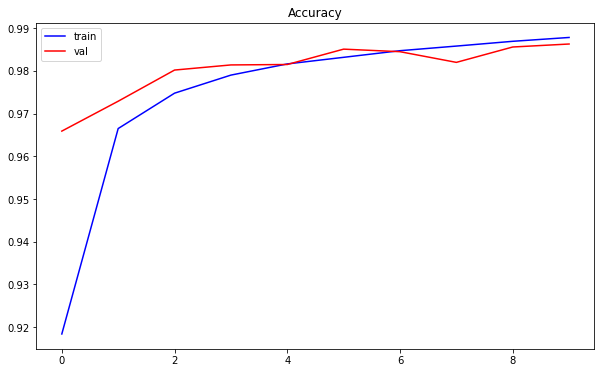

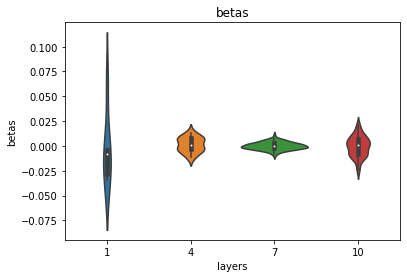

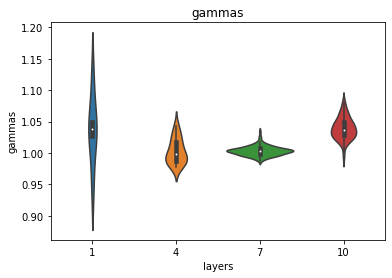

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
LeNet_model = LeNet()
train_model(LeNet_model, X_train, y_train, X_test, y_test, mode = 0)
bn_layers = [1,4, 7, 10]
bn_weights_plot(LeNet_model, bn_layers)

In [ ]:
# leanred batch normalization parameters for each layer:
for i in bn_layers:
  print(f'{i} th layer beta:{LeNet_model.layers[i].beta}')
  print(f'{i} the layer gamma:{LeNet_model.layers[i].gamma}')

1 th layer beta:<tf.Variable 'batch_normalization_2/beta:0' shape=(6,) dtype=float32, numpy=
array([ 0.07187721, -0.00020645, -0.04891669, -0.03695174,  0.05428472,
       -0.11248716], dtype=float32)>
1 the layer gamma:<tf.Variable 'batch_normalization_2/gamma:0' shape=(6,) dtype=float32, numpy=
array([1.071391 , 0.985414 , 1.0062625, 1.1005067, 1.0307479, 1.0648712],
      dtype=float32)>
4 th layer beta:<tf.Variable 'batch_normalization_3/beta:0' shape=(16,) dtype=float32, numpy=
array([ 0.00399205, -0.0004378 ,  0.00326663, -0.00520717,  0.0045089 ,
        0.0016202 ,  0.01134436, -0.0021559 ,  0.00926293, -0.0017241 ,
       -0.0024808 ,  0.00599002, -0.00083925, -0.00125264,  0.00850276,
       -0.00615262], dtype=float32)>
4 the layer gamma:<tf.Variable 'batch_normalization_3/gamma:0' shape=(16,) dtype=float32, numpy=
array([1.007627  , 1.0299791 , 0.9782103 , 0.9744692 , 1.0090379 ,
       1.0175077 , 1.029381  , 0.9938123 , 1.0152887 , 0.9920472 ,
       1.0130725 , 0.9950425

3. Next instead of standard normalization use batch normalization for input layer also and train the network. Plot the distribution of learned batch norm parameters for each layer (including input) using violin plots. Compare the train/test accuracy and loss for the two cases ? Did batch normalization for input layer improve performance ?

Epoch 1/10
469/469 [==============================] - 31s 65ms/step - loss: 0.2568 - accuracy: 0.9293 - val_loss: 0.1191 - val_accuracy: 0.9685
Epoch 2/10
469/469 [==============================] - 30s 64ms/step - loss: 0.1088 - accuracy: 0.9704 - val_loss: 0.0831 - val_accuracy: 0.9773
Epoch 3/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0827 - accuracy: 0.9777 - val_loss: 0.0664 - val_accuracy: 0.9815
Epoch 4/10
469/469 [==============================] - 34s 72ms/step - loss: 0.0693 - accuracy: 0.9815 - val_loss: 0.0640 - val_accuracy: 0.9817
Epoch 5/10
469/469 [==============================] - 31s 65ms/step - loss: 0.0604 - accuracy: 0.9838 - val_loss: 0.0539 - val_accuracy: 0.9843
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0539 - accuracy: 0.9856 - val_loss: 0.0505 - val_accuracy: 0.9846
Epoch 7/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0489 - accuracy: 0.9869 - val_loss: 0.0467 - val_accuracy:

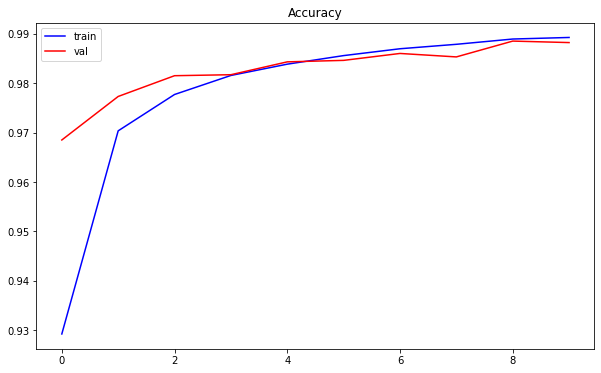

In [ ]:
def LeNet_2():

  model = Sequential()
  model.add(BatchNormalization())

  model.add(Conv2D(6, 5, activation='tanh', input_shape=(28,28,1)))
  model.add(BatchNormalization())
  model.add(AveragePooling2D(2))

  model.add(Conv2D(16, 5, activation='tanh'))
  model.add(BatchNormalization())
  model.add(AveragePooling2D(2))

  model.add(Dense(120, activation='tanh'))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(84, activation='tanh'))
  model.add(BatchNormalization())

  model.add(Dense(10, activation='softmax'))

  
  opt = SGD(lr = 0.01)
  model.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy'])      
  return model


(X_train, y_train), (X_test, y_test) = mnist.load_data()
LeNet_model_2 = LeNet_2()
train_model(LeNet_model_2, X_train, y_train, X_test, y_test, mode = 1)


In [ ]:

print(f'beta of first layer: {np.array(LeNet_model_2.layers[0].beta)}')
print(f'gamma of first layer: {np.array(LeNet_model_2.layers[0].gamma)}')


beta of first layer: [0.30101624]
gamma of first layer: [1.1891103]


weights of the remaining BN layers


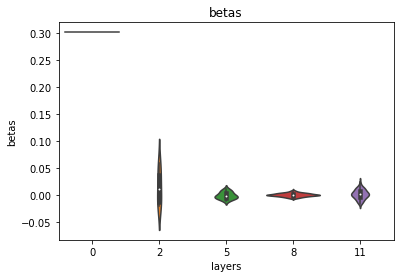

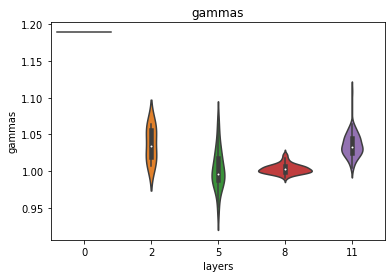

In [ ]:

print('weights of the remaining BN layers')
bn_layers_2 = [0, 2,5, 8, 11]
bn_weights_plot(LeNet_model_2, bn_layers_2)


If we standardize the input before training the network and add batch normalization after each hidden layer, the train accuracy is  98.900%, the test accuracy:  98.630%, and the loss is: 0.0524. If we use bathch normalization on input layer and the output of each hidden layer, the train accuracy is 99.045%: , the test accuracy is 98.820%: and the loss is: 0.0481. The accuracy is similar in both cases, with the accuracy of the second case being slightly better. Given that standard normalization on all inputs can achieve similar performance, it seems that batch normalization on input layer has limited improvement on performance.

4. Train the network without batch normalization but this time use dropout. For hidden layers use dropout probability of 0.5 and for input layer take it to be 0.2 Compare test accuracy using dropout to test accuracy obtained using batch normalization in part 2 and 3.

Epoch 1/10
469/469 [==============================] - 18s 38ms/step - loss: 1.1515 - accuracy: 0.6309 - val_loss: 0.4729 - val_accuracy: 0.8714
Epoch 2/10
469/469 [==============================] - 19s 40ms/step - loss: 0.6601 - accuracy: 0.7926 - val_loss: 0.3727 - val_accuracy: 0.8924
Epoch 3/10
469/469 [==============================] - 18s 38ms/step - loss: 0.5765 - accuracy: 0.8184 - val_loss: 0.3333 - val_accuracy: 0.9020
Epoch 4/10
469/469 [==============================] - 18s 38ms/step - loss: 0.5333 - accuracy: 0.8349 - val_loss: 0.3064 - val_accuracy: 0.9079
Epoch 5/10
469/469 [==============================] - 18s 38ms/step - loss: 0.5023 - accuracy: 0.8426 - val_loss: 0.2886 - val_accuracy: 0.9142
Epoch 6/10
469/469 [==============================] - 18s 38ms/step - loss: 0.4857 - accuracy: 0.8508 - val_loss: 0.2740 - val_accuracy: 0.9180
Epoch 7/10
469/469 [==============================] - 18s 38ms/step - loss: 0.4654 - accuracy: 0.8555 - val_loss: 0.2599 - val_accuracy:

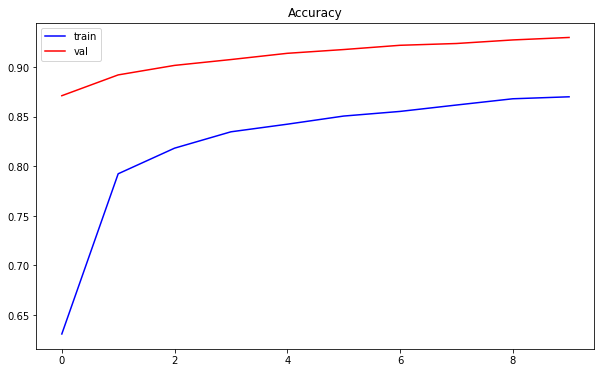

In [ ]:
def LeNet_dropout():

  model = Sequential()
  model.add(Dropout(0.2))

  model.add(Conv2D(6, 5, activation='tanh', input_shape=(28,28,1)))
  model.add(Dropout(0.5))
  model.add(AveragePooling2D(2))

  model.add(Conv2D(16, 5, activation='tanh'))
  model.add(Dropout(0.5))
  model.add(AveragePooling2D(2))

  model.add(Dense(120, activation='tanh'))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(84, activation='tanh'))
  model.add(Dropout(0.5))

  model.add(Dense(10, activation='softmax'))

  
  opt = SGD(lr = 0.01)
  model.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy'])      
  return model


(X_train, y_train), (X_test, y_test) = mnist.load_data()
LeNet_model_dropout = LeNet_dropout()
train_model(LeNet_model_dropout, X_train, y_train, X_test, y_test, mode = 0)


the train accuracy using dropout is:92.7%. The test accuracy using dropout is: 93.02%. The performance is slightly worse than the result obtained using batch normalization in part 2 and 3. 

5. Now train the network using both batch normalization and dropout. How does the performance (test accuracy) of the network compare with the cases with dropout alone and with batch normalization alone ?

Epoch 1/10
469/469 [==============================] - 29s 60ms/step - loss: 1.0249 - accuracy: 0.6646 - val_loss: 0.3654 - val_accuracy: 0.8927
Epoch 2/10
469/469 [==============================] - 28s 61ms/step - loss: 0.6316 - accuracy: 0.8015 - val_loss: 0.3036 - val_accuracy: 0.9099
Epoch 3/10
469/469 [==============================] - 27s 58ms/step - loss: 0.5411 - accuracy: 0.8310 - val_loss: 0.2637 - val_accuracy: 0.9205
Epoch 4/10
469/469 [==============================] - 26s 56ms/step - loss: 0.4785 - accuracy: 0.8504 - val_loss: 0.2234 - val_accuracy: 0.9288
Epoch 5/10
469/469 [==============================] - 26s 56ms/step - loss: 0.4325 - accuracy: 0.8678 - val_loss: 0.1934 - val_accuracy: 0.9395
Epoch 6/10
469/469 [==============================] - 26s 56ms/step - loss: 0.3898 - accuracy: 0.8813 - val_loss: 0.1674 - val_accuracy: 0.9475
Epoch 7/10
469/469 [==============================] - 28s 59ms/step - loss: 0.3570 - accuracy: 0.8910 - val_loss: 0.1510 - val_accuracy:

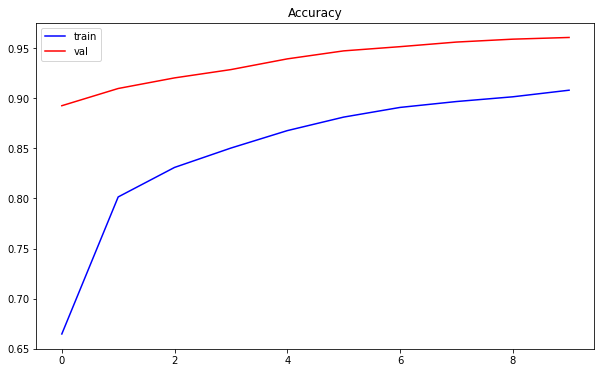

In [ ]:
def LeNet_dropout_with_bn():
  model = Sequential()
  model.add(Dropout(0.2))
  model.add(BatchNormalization())

  model.add(Conv2D(6, 5, activation='tanh', input_shape=(28,28,1)))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  model.add(AveragePooling2D(2))

  model.add(Conv2D(16, 5, activation='tanh'))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  model.add(AveragePooling2D(2))

  model.add(Dense(120, activation='tanh'))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(84, activation='tanh'))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Dense(10, activation='softmax'))

  opt = SGD(lr = 0.01)
  model.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy'])      
  return model


(X_train, y_train), (X_test, y_test) = mnist.load_data()
LeNet_model_dropout_with_bn = LeNet_dropout_with_bn()
train_model(LeNet_model_dropout_with_bn, X_train, y_train, X_test, y_test, mode = 0)

If we combine dropout with batch normalization, the test accuracy is: 96.090%, which is higer than applying the dropout alone, but slightly worse than applying batch normalization alone. 